# -------------------- EDA JUAN ZUBIAGA ------------------------

## 0. IMPORTAR LIBRERIAS Y DATOS

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
from bs4 import BeautifulSoup as bs
import requests
import pickle

pd.set_option('max_colwidth', 800)

In [292]:
movdat="/Users/juanzubiaga/Desktop/BOOTCAMPDS/1-Local/EDA/J-EDA/TMDB_Movie_Limpito.csv"
moviesdbinfo=pd.read_csv(movdat)
moviesdb=moviesdbinfo.drop(columns={'overview'})

In [293]:
mov322= "/Users/juanzubiaga/Desktop/BOOTCAMPDS/1-Local/EDA/J-EDA/100movies322.csv"

movies322= pd.read_csv(mov322)
movies322.columns

Index(['Title', 'IMDB Rating', 'Year', 'Month', 'Certificate', 'Runtime',
       'Directors', 'Stars', 'Genre', 'Filming_location', 'Budget', 'Income',
       'Country_of_origin'],
      dtype='object')

He tenido un desajuste con otra de las pestañas en las que he desarrollado una de las hipótesis, entonces tengo que hacer una copia de movies322 quitando alguna de las columnas

In [294]:
movies22=movies322[['Title','IMDB Rating','Year','Runtime','Genre','Budget','Income','Country_of_origin']]

In [295]:
movi= "/Users/juanzubiaga/Desktop/BOOTCAMPDS/1-Local/EDA/J-EDA/movies.csv"
movies= pd.read_csv(movi)
movies.columns


Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

In [296]:
oscar2="/Users/juanzubiaga/Desktop/BOOTCAMPDS/1-Local/EDA/J-EDA/the_oscar_award.csv"
oscar2=pd.read_csv(oscar2)
oscar2.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False


In [297]:
os= "/Users/juanzubiaga/Desktop/BOOTCAMPDS/1-Local/EDA/oscars_df.csv"
oscars= pd.read_csv(os)
oscars[oscars['Award']=='Winner']

,Unnamed: 0,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,...,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
0,0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,"12,221",...,Certified-Fresh,93.0,46.0,Upright,78.0,3530.0,9.0,43.0,3.0,2becf7d5-a3de-46ab-ae45-abdd6b588067
3,3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,1929,100,"Drama,Musical,Romance",5.7,"6,890",...,Rotten,33.0,24.0,Spilled,21.0,1813.0,7.0,8.0,16.0,de063f3f-2d35-4e1c-8636-6eb4c16bd236
8,8,All Quiet on the Western Front,1929/30,Universal,Winner,1930,152,"Drama,War",8.1,"59,214",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,281742f9-3b4e-480d-b704-c8c15de6b721
13,13,Cimarron,1930/31,RKO Radio,Winner,1931,123,"Drama,Western",5.9,"5,851",...,Rotten,50.0,24.0,Spilled,25.0,1514.0,6.0,12.0,12.0,db2683c0-128e-4b5c-858f-d9f18c2fb9b9
18,18,Grand Hotel,1931/32,Metro-Goldwyn-Mayer,Winner,1932,112,"Drama,Romance",7.4,"18,314",...,Certified-Fresh,86.0,42.0,Upright,77.0,7014.0,10.0,36.0,6.0,be69f946-6adc-47e4-8491-79d6c033f59d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,520,Spotlight,2015,"Blye Pagon Faust, Steve Golin, Nicole Rocklin, and Michael Sugar",Winner,2015,129,"Biography,Crime,Drama",8.1,"440,413",...,Certified-Fresh,97.0,367.0,Upright,93.0,70385.0,59.0,355.0,12.0,e8728900-9b21-4486-8a41-893439f118f3
528,528,Moonlight,2016,"Adele Romanski, Dede Gardner, and Jeremy Kleiner",Winner,2016,111,Drama,7.4,"287,563",...,Certified-Fresh,98.0,384.0,Upright,79.0,45533.0,63.0,378.0,7.0,194103bc-9dbe-4396-ad61-8370f887ce45
537,537,The Shape of Water,2017,Guillermo del Toro and J. Miles Dale,Winner,2017,123,"Adventure,Drama,Fantasy",7.3,"391,523",...,Certified-Fresh,92.0,448.0,Upright,72.0,25784.0,59.0,414.0,34.0,05e574cc-0583-419f-9300-257cf0c4d110
546,546,Green Book,2018,"Jim Burke, Charles B. Wessler, Brian Currie, Peter Farrelly, and Nick Vallelonga",Winner,2018,130,"Biography,Comedy,Drama",8.2,"422,669",...,Certified-Fresh,77.0,354.0,Upright,91.0,10093.0,49.0,274.0,80.0,4dd226cc-dc68-40e7-a5b3-3b1bfff594f1


No he encontrado informacion fiable sobre los Premios Goya, por lo que he recopilado manualmente a través de diversas fuentes (principalmente Wikipedia), todas las ganadoras a Mejor Película.

In [298]:
conteo_goya= pd.Series([1,4,11,26,8,2,2], 
                       index=['Supervivencia', 'Suspense', 'Comedia','Drama', 'Thriller', 'Fantasía','Terror'])

# 1. LIMPIAR DATOS

## 1.1

In [299]:
movies22.dtypes

Title                 object
IMDB Rating          float64
Year                   int64
Runtime               object
Genre                 object
Budget                object
Income                object
Country_of_origin     object
dtype: object

In [300]:
movies22.isnull().sum()

Title                0
IMDB Rating          1
Year                 0
Runtime              0
Genre                0
Budget               0
Income               1
Country_of_origin    0
dtype: int64

Al intentar convertir las variables numericas a ints o floats para combinarla con otra ds me daba error porque existen unknowns. Tengo que convertirlos a Nans para poder continuar.

In [301]:
movies22.replace('Unknown',pd.NA,inplace=True)
movies22.isnull().sum()

/var/folders/3z/73lxqgp11kb61sfk787_46800000gn/T/ipykernel_85907/723219566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies22.replace('Unknown',pd.NA,inplace=True)


Title                  0
IMDB Rating            1
Year                   0
Runtime                2
Genre                  0
Budget               304
Income               145
Country_of_origin      0
dtype: int64

In [302]:
movies22[(movies22['Runtime'].isna())|(movies22['IMDB Rating'].isna())]

,Title,IMDB Rating,Year,Runtime,Genre,Budget,Income,Country_of_origin
85,A Man Called Otto,NaN,2022,126,"Comedy, Drama",<NA>,<NA>,"Sweden, United States"
848,Mantus,2.1,2014,<NA>,"Comedy, Drama, Thriller","$250,000",<NA>,United States
1249,My Little Princess,3.2,2010,<NA>,"Romance, Drama, Family",$10,<NA>,United States


Ya que mi hipotesis se centra en películas minimamente populares o conocidas, voy a optar por ignorar de mi estudio Mantus, que no tiene ni pagina en IMDB, y My Little Princess, que es un cortometraje con una valoración muy baja. Y a cambio de este ahorro en esfuerzo, voy a completar la informacion de la primera, que si conozco, con webscrapping, en lugar de buscarla en el movil y rellenarla manualmente.

In [303]:
movies22.drop(labels=[848,1249],inplace=True)

/var/folders/3z/73lxqgp11kb61sfk787_46800000gn/T/ipykernel_85907/779581153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies22.drop(labels=[848,1249],inplace=True)


In [304]:
from fake_useragent import UserAgent
ua= UserAgent()
headers = {'User-Agent': ua.random}
url= "https://www.imdb.com/es-es/title/tt7405458/"
response = requests.get(url, headers=headers)
print(response)
html=response.content
soup = bs(html, 'html.parser')

<Response [200]>


In [305]:
ottorating= soup.findAll('span',class_='sc-d541859f-1 imUuxf')
ottorating[0].text

'7,5'

In [306]:
movies22['IMDB Rating']=movies22['IMDB Rating'].fillna(ottorating[0].text)
movies22.iloc[84:87]

/var/folders/3z/73lxqgp11kb61sfk787_46800000gn/T/ipykernel_85907/442755013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies22['IMDB Rating']=movies22['IMDB Rating'].fillna(ottorating[0].text)


,Title,IMDB Rating,Year,Runtime,Genre,Budget,Income,Country_of_origin
84,Drishyam 2,8.6,2022,140,"Crime, Drama, Mystery",<NA>,"$2,776,721",India
85,A Man Called Otto,"7,5",2022,126,"Comedy, Drama",<NA>,<NA>,"Sweden, United States"
86,The Apology,5.0,2022,91,Thriller,<NA>,<NA>,United States


In [307]:
movies22['IMDB Rating']=movies22['IMDB Rating'].replace('7,5','7.5')
movies22.iloc[84:87]

/var/folders/3z/73lxqgp11kb61sfk787_46800000gn/T/ipykernel_85907/116785141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies22['IMDB Rating']=movies22['IMDB Rating'].replace('7,5','7.5')


,Title,IMDB Rating,Year,Runtime,Genre,Budget,Income,Country_of_origin
84,Drishyam 2,8.6,2022,140,"Crime, Drama, Mystery",<NA>,"$2,776,721",India
85,A Man Called Otto,7.5,2022,126,"Comedy, Drama",<NA>,<NA>,"Sweden, United States"
86,The Apology,5.0,2022,91,Thriller,<NA>,<NA>,United States


In [308]:
movies[movies['original_title']!=movies['title']]

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
97,97,15000000,Action Adventure Drama Horror Science Fiction,NaN,315011,monster godzilla giant monster destruction kaiju,ja,シン・ゴジラ,"From the mind behind Evangelion comes a hit larger than life. When a massive, gilled monster emerges from the deep and tears through the city, the government scrambles to save its citizens. A rag-tag team of volunteers cuts through a web of red tape to uncover the monster's weakness and its mysterious ties to a foreign superpower. But time is not on their side - the greatest catastrophe to ever befall the world is about to evolve right before their very eyes.",9.476999,...,120.0,"[{""iso_639_1"": ""it"", ""Italiano""}, {""iso_639_1"": ""de"", ""Deutsch""}, {""iso_639_1"": ""en"", ""English""}, {""iso_639_1"": ""ja"", ""\u65e5\u672c\u8a9e""}]",Released,A god incarnate. A city doomed.,Shin Godzilla,6.5,143,Hiroki Hasegawa Yutaka Takenouchi Satomi Ishihara Kengo Kora Matsuo Satoru,"[{'name': 'Shir\\u00f4 Sagisu', 'gender': 0, 'department': 'Sound', 'job': 'Original Music Composer', 'credit_id': '5921d321c3a368799b05933f', 'id': 17132}, {'name': 'Takashi Yamazaki', 'gender': 0, 'department': 'Visual Effects', 'job': 'Visual Effects', 'credit_id': '5921d8e9c3a3687a8e059cc5', 'id': 43652}, {'name': 'Mahiro Maeda', 'gender': 2, 'department': 'Art', 'job': 'Art Direction', 'credit_id': '57e5f7c3c3a368351e002274', 'id': 56341}, {'name': 'Hideaki Anno', 'gender': 2, 'department': 'Directing', 'job': 'Director', 'credit_id': '560892fa92514177550018b2', 'id': 77921}, {'name': 'Hideaki Anno', 'gender': 2, 'department': 'Writing', 'job': 'Screenplay', 'credit_id': '57e5f687c3a368222700290d', 'id': 77921}, {'name': 'Hideaki Anno', 'gender': 2, 'department': 'Sound', 'job': '...",Hideaki Anno
215,215,130000000,Adventure Fantasy Action Thriller,NaN,1979,fire helicopter surfboard mask satellite,en,4: Rise of the Silver Surfer,"The Fantastic Four return to the big screen as a new and all powerful enemy threatens the Earth. The seemingly unstoppable 'Silver Surfer', but all is not what it seems and there are old and new enemies that pose a greater threat than the intrepid superheroes realize.",60.810723,...,92.0,"[{""iso_639_1"": ""en"", ""English""}, {""iso_639_1"": ""ja"", ""\u65e5\u672c\u8a9e""}, {""iso_639_1"": ""ar"", ""\u0627\u0644\u0639\u0631\u0628\u064a\u0629""}, {""iso_639_1"": ""zh"", ""\u666e\u901a\u8bdd""}]",Released,Discover the secret of the Surfer.,Fantastic 4: Rise of the Silver Surfer,5.4,2589,Ioan Gruffudd Jessica Alba Chris Evans Michael Chiklis Julian McMahon,"[{'name': 'Michael McCusker', 'gender': 2, 'department': 'Editing', 'job': 'Editor', 'credit_id': '52fe4328c3a36847f803eac7', 'id': 433}, {'name': 'Michael McCusker', 'gender': 2, 'department': 'Editing', 'job': 'Additional Editing', 'credit_id': '578baf5cc3a3685a9800152e', 'id': 433}, {'name': 'Bernd Eichinger', 'gender': 2, 'department': 'Production', 'job': 'Producer', 'credit_id': '52fe4328c3a36847f803eb07', 'id': 673}, {'name': 'Ralph Winter', 'gender': 0, 'department': 'Production', 'job': 'Producer', 'credit_id': '52fe4328c3a36847f803eb0d', 'id': 2095}, {'name': 'William Hoy', 'gender': 2, 'department': 'Editing', 'job': 'Editor', 'credit_id': '578bafa69251413fa4001630', 'id': 2122}, {'name': 'Heike Brandstatter', 'gender': 1, 'department': 'Production', 'job': 'Casting', 'credi...",Tim Story
235,235,97250400,Fantasy Adventure Comedy Family,http://www.asterixauxjeuxolympiques.com/index.php,2395,competition greece colosseum olympic games emperor,fr,Astérix aux Jeux Olympiques,"Astérix and Obélix have to win the Olympic Games in order to help their friend Alafolix marry Princess Irina (portrayed by supermodel Vanessa Hessler). Brutus (Benoît Poelvoorde) uses every trick in the book to have his own team win the game, and get rid of his father Julius Cae

Veo que el original title es el titulo en el idioma de producción, por lo que para el estudio solo me interesa el titulo en inglés, que coincide en su mayoria con el original. Lo siguiente es quedarme solo con el año en la fecha de estreno y tratar de filtrarla.

In [309]:
movies.drop(columns=['original_title','homepage','id','keywords','original_language','overview','production_companies','spoken_languages','status','tagline','vote_average', 'vote_count','cast','crew','director'],inplace=True)
movies.dtypes

index                     int64
budget                    int64
genres                   object
popularity              float64
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
title                    object
dtype: object

In [310]:
movies[movies['popularity']<2]

,index,budget,genres,popularity,production_countries,release_date,revenue,runtime,title
272,272,90000000,Comedy Romance,1.004579,[],2001-04-27,10372291,104.0,Town & Country
334,334,93000000,Adventure Action Thriller Science Fiction,1.859364,"[ ""US"",}]",2001-07-18,368780809,92.0,Jurassic Park III
463,463,0,Romance Drama,0.605645,"[ ""US"",}]",1998-04-22,0,117.0,Déjà Vu
492,492,8000000,Comedy Animation,0.719996,"[ ""IN"",}, ""MX"",}]",2015-10-30,0,89.0,Top Cat Begins
798,798,58000000,Comedy,1.551497,"[ ""US"",}]",2013-06-07,44000000,119.0,The Internship
...,...,...,...,...,...,...,...,...,...
4796,4797,0,Foreign Thriller,0.022173,[],2005-03-12,0,80.0,Cavite
4798,4799,9000,Comedy Romance,0.642552,[],2011-12-26,0,85.0,Newlyweds
4799,4800,0,Comedy Drama Romance TV Movie,1.444476,"[ ""US"",}]",2013-10-13,0,120.0,"Signed, Sealed, Delivered"
4800,4801,0,NaN,0.857008,"[ ""US"",}, ""CN"", ""China""}]",2012-05-03,0,98.0,Shanghai Calling


In [311]:
print(movies[movies['popularity']<1.5].isnull().sum())
print(movies[movies['popularity']>1.5].isnull().sum())

index                    0
budget                   0
genres                  28
popularity               0
production_countries     0
release_date             1
revenue                  0
runtime                  2
title                    0
dtype: int64
index                   0
budget                  0
genres                  0
popularity              0
production_countries    0
release_date            0
revenue                 0
runtime                 0
title                   0
dtype: int64


Por la misma razon, voy a descartar aquellas con indices de popularidad bajos, que además resultan ser en las que se concentran los NaNs.

In [312]:
movies.drop(movies[movies['popularity']<1.5].index,inplace=True)
movies.shape

(4262, 9)

In [313]:
movies.rename(columns={'release_date':'Year'},inplace=True)
movies.rename(columns={'title':'Title'},inplace=True)
movies['Year'] = movies['Year'].apply(lambda x: str(x).split('-')[0])
movies.head()


,index,budget,genres,popularity,production_countries,Year,revenue,runtime,Title
0,0,237000000,Action Adventure Fantasy Science Fiction,150.437577,"[ ""US"",}, ""GB"",}]",2009,2787965087,162.0,Avatar
1,1,300000000,Adventure Fantasy Action,139.082615,"[ ""US"",}]",2007,961000000,169.0,Pirates of the Caribbean: At World's End
2,2,245000000,Action Adventure Crime,107.376788,"[ ""GB"",}, ""US"",}]",2015,880674609,148.0,Spectre
3,3,250000000,Action Crime Drama Thriller,112.312950,"[ ""US"",}]",2012,1084939099,165.0,The Dark Knight Rises
4,4,260000000,Action Adventure Science Fiction,43.926995,"[ ""US"",}]",2012,284139100,132.0,John Carter


Para poder comparar las duraciones de las dos ds tengo que hacer que las variables que voy a juntar sean del mismo tipo.

In [314]:
movies.dtypes

index                     int64
budget                    int64
genres                   object
popularity              float64
production_countries     object
Year                     object
revenue                   int64
runtime                 float64
Title                    object
dtype: object

In [315]:
movies22['Runtime']=movies22['Runtime'].fillna(0)
movies22['Runtime']=movies22['Runtime'].astype('Int64')
movies22['Runtime']=movies22['Runtime'].replace(0,pd.NA)
movies['runtime']=movies['runtime'].fillna(0)
movies['runtime']=movies['runtime'].astype('Int64')
movies['runtime']=movies['runtime'].replace(0,pd.NA)
movies.rename(columns={'runtime':'Runtime'},inplace=True)
movies['Year']=movies['Year'].fillna(0)
movies['Year']=movies['Year'].astype(int)
movies['Year']=movies['Year'].replace(0,pd.NA)
movies['popularity']=movies['popularity'].fillna(0)
movies['popularity']=movies['popularity'].astype(float)
movies['popularity']=movies['popularity'].replace(0,pd.NA)
movies22['IMDB Rating']=movies22['IMDB Rating'].fillna(0)
movies22['IMDB Rating']=movies22['IMDB Rating'].astype(float)
movies22['IMDB Rating']=movies22['IMDB Rating'].replace(0,pd.NA)

/var/folders/3z/73lxqgp11kb61sfk787_46800000gn/T/ipykernel_85907/2618163894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies22['Runtime']=movies22['Runtime'].fillna(0)
/var/folders/3z/73lxqgp11kb61sfk787_46800000gn/T/ipykernel_85907/2618163894.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies22['Runtime']=movies22['Runtime'].astype('Int64')
/var/folders/3z/73lxqgp11kb61sfk787_46800000gn/T/ipykernel_85907/2618163894.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [316]:
print(movies.dtypes)
print(movies22.dtypes)

index                     int64
budget                    int64
genres                   object
popularity              float64
production_countries     object
Year                      int64
revenue                   int64
Runtime                   Int64
Title                    object
dtype: object
Title                 object
IMDB Rating          float64
Year                   int64
Runtime                Int64
Genre                 object
Budget                object
Income                object
Country_of_origin     object
dtype: object


In [317]:
print(movies22.isnull().sum())
print(movies.isna().sum())


Title                  0
IMDB Rating            0
Year                   0
Runtime                0
Genre                  0
Budget               304
Income               143
Country_of_origin      0
dtype: int64
index                   0
budget                  0
genres                  0
popularity              0
production_countries    0
Year                    0
revenue                 0
Runtime                 2
Title                   0
dtype: int64


In [318]:
movies[movies['Runtime'].isna()]

,index,budget,genres,popularity,production_countries,Year,revenue,Runtime,Title
3809,3809,4000000,Comedy Romance TV Movie,1.923514,"[ ""US"",}]",2012,0,<NA>,How to Fall in Love
4241,4241,1500000,Comedy,2.028170,[],2005,0,<NA>,The Salon


He estado indagando y preguntando en los foros y a copilot y no consigo entender porque me crea estos nans, pero por suerte es en peliculas poco conocidas que en un ds tan grande puedo ignorar.

In [319]:
movies.drop(labels=[3809,4241],inplace=True)

In [320]:
print(movies22.isnull().sum())
print(movies.isna().sum())


Title                  0
IMDB Rating            0
Year                   0
Runtime                0
Genre                  0
Budget               304
Income               143
Country_of_origin      0
dtype: int64
index                   0
budget                  0
genres                  0
popularity              0
production_countries    0
Year                    0
revenue                 0
Runtime                 0
Title                   0
dtype: int64


In [321]:
moviesdbinfo.isnull().sum()

id                          0
title                       1
vote_average                0
vote_count                  0
status                      0
release_date            19830
revenue                     0
runtime                     0
adult                       0
budget                      0
overview                15103
popularity                  0
genres                  65967
production_countries    83578
spoken_languages        63873
dtype: int64

In [322]:
moviesdb.rename(columns={'release_date':'Year'},inplace=True)
moviesdb.rename(columns={'title':'Title'},inplace=True)
moviesdb['popularity'] = moviesdb['popularity'].apply(lambda x: str(x).split('.')[0])
moviesdb['popularity'] = moviesdb['popularity'].astype(int)
moviesdb['Year'] = moviesdb['Year'].apply(lambda x: str(x).split('-')[0])
moviesdb['Year']=moviesdb['Year'].replace('nan','0')
moviesdb['Year']=moviesdb['Year'].fillna(0)
moviesdb['Year']=moviesdb['Year'].replace(0,pd.NA)
moviesdb['Year']=moviesdb['Year'].astype('int')
print(moviesdb.dtypes)
moviesdb

id                        int64
Title                    object
vote_average            float64
vote_count                int64
status                   object
Year                      int64
revenue                   int64
runtime                   int64
adult                      bool
budget                    int64
popularity                int64
genres                   object
production_countries     object
spoken_languages         object
dtype: object


,id,Title,vote_average,vote_count,status,Year,revenue,runtime,adult,budget,popularity,genres,production_countries,spoken_languages
0,27205,Inception,8.364,34495,Released,2010,825532764,148,False,160000000,83,"Action, Science Fiction, Adventure","United Kingdom, United States of America","English, French, Japanese, Swahili"
1,157336,Interstellar,8.417,32571,Released,2014,701729206,169,False,165000000,140,"Adventure, Drama, Science Fiction","United Kingdom, United States of America",English
2,155,The Dark Knight,8.512,30619,Released,2008,1004558444,152,False,185000000,130,"Drama, Action, Crime, Thriller","United Kingdom, United States of America","English, Mandarin"
3,19995,Avatar,7.573,29815,Released,2009,2923706026,162,False,237000000,79,"Action, Adventure, Fantasy, Science Fiction","United States of America, United Kingdom","English, Spanish"
4,24428,The Avengers,7.710,29166,Released,2012,1518815515,143,False,220000000,98,"Science Fiction, Action, Adventure",United States of America,"English, Hindi, Russian"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314521,754754,Royal Opera House Live: Die Walküre,0.000,0,Released,2018,0,290,False,0,0,NaN,United Kingdom,NaN
314522,754768,Sueños de Polvorón,0.000,0,Released,2006,0,70,False,0,0,NaN,Argentina,NaN
314523,754737,Sex Girl 4,0.000,0,Released,2020,0,74,False,0,8,Drama,South Korea,Korean
314524,754736,Sex Girl 3,0.000,0,Released,2020,0,63,False,0,2,Drama,South Korea,Korean


In [323]:
moviesdb.isnull().sum()

id                          0
Title                       1
vote_average                0
vote_count                  0
status                      0
Year                        0
revenue                     0
runtime                     0
adult                       0
budget                      0
popularity                  0
genres                  65967
production_countries    83578
spoken_languages        63873
dtype: int64

He encontrado una base de datos de un millon de peliculas y a primera vista bastante limpia. Ya la he reducido en otra ventana quitando columnas que no me interesan, documentales, peliculas cortas y peliculas para adultos, para poder importarla mas rapido, y ahora tengo que filtrarla bastante tratando de obtener peliculas populares y minimamente votadas. Que sea tan extensa me baja el riesgo de que un error de sus escritores me afecte mucho al analisis. 

In [324]:
moviesdb[(moviesdb['Title'].str.contains('sex'))|(moviesdb['Title'].str.contains('Sex'))]

,id,Title,vote_average,vote_count,status,Year,revenue,runtime,adult,budget,popularity,genres,production_countries,spoken_languages
1115,225886,Sex Tape,5.405,3874,Released,2014,126069509,97,False,40000000,40,Comedy,United States of America,English
2186,4564,Sex and the City,6.560,1979,Released,2008,418765519,145,False,65000000,36,"Comedy, Drama, Romance",United States of America,English
2460,369192,Battle of the Sexes,6.777,1736,Released,2017,12638526,121,False,25000000,13,"Comedy, Drama, History","United Kingdom, United States of America",English
2759,37786,Sex and the City 2,6.100,1522,Released,2010,290745055,146,False,100000000,19,"Comedy, Drama, Romance",United States of America,"English, Arabic"
3345,13523,Sex Drive,6.350,1220,Released,2008,18755936,109,False,19000000,25,"Comedy, Adventure, Romance",United States of America,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313990,750361,Inem the Sexy Maid II,0.000,0,Released,1977,0,95,False,0,0,"Comedy, Drama",NaN,Indonesian
314227,757320,Sex Girl 5,0.000,0,Released,2020,0,64,False,0,12,Drama,South Korea,Korean
314506,754901,Sexy Cats: Kaitou Cosple Sanshimai,0.000,0,Released,2004,0,70,False,0,1,NaN,NaN,Japanese
314523,754737,Sex Girl 4,0.000,0,Released,2020,0,74,False,0,8,Drama,South Korea,Korean


In [325]:
moviesdb[((moviesdb['Title'].str.contains('sex'))|(moviesdb['Title'].str.contains('Sex')))&((moviesdb['vote_count']<10))&(moviesdb['popularity']<5)]

,id,Title,vote_average,vote_count,status,Year,revenue,runtime,adult,budget,popularity,genres,production_countries,spoken_languages
64323,307450,Sexy Warriors,5.8,9,Released,2014,0,82,False,0,2,Comedy,United States of America,English
64514,451555,The Sex Substitute,5.7,9,Released,2001,0,95,False,0,2,"Drama, Comedy",United States of America,English
64859,74722,John Leguizamo: Sexaholix... A Love Story,5.3,9,Released,2002,0,92,False,0,1,Comedy,NaN,English
65019,355992,El sexo sentido,4.6,9,Released,1981,0,95,False,0,2,"Comedy, Romance",Mexico,Spanish
65644,65895,Sex & Perestroika,3.4,9,Released,1990,0,90,False,0,1,Comedy,France,"French, Russian"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312730,758687,Sex Girl 6,0.0,0,Released,2020,0,61,False,0,2,"Drama, Romance",South Korea,Korean
313291,763640,Man Into Woman: The Transsexual Experience,0.0,0,Released,1983,0,80,False,0,0,NaN,NaN,NaN
313990,750361,Inem the Sexy Maid II,0.0,0,Released,1977,0,95,False,0,0,"Comedy, Drama",NaN,Indonesian
314506,754901,Sexy Cats: Kaitou Cosple Sanshimai,0.0,0,Released,2004,0,70,False,0,1,NaN,NaN,Japanese


In [326]:
mascarasx= ((moviesdb['Title'].str.contains('sex', case=False))&(((moviesdb['vote_count']<10)&(moviesdb['popularity']<5))|(moviesdb['budget']==0)))
moviesdb=moviesdb[~mascarasx]

In [327]:
moviesdb[moviesdb['Title'].astype(str).str.contains('Sex',case=False)].head(10)

,id,Title,vote_average,vote_count,status,Year,revenue,runtime,adult,budget,popularity,genres,production_countries,spoken_languages
1115,225886,Sex Tape,5.405,3874,Released,2014,126069509,97,False,40000000,40,Comedy,United States of America,English
2186,4564,Sex and the City,6.560,1979,Released,2008,418765519,145,False,65000000,36,"Comedy, Drama, Romance",United States of America,English
2460,369192,Battle of the Sexes,6.777,1736,Released,2017,12638526,121,False,25000000,13,"Comedy, Drama, History","United Kingdom, United States of America",English
2759,37786,Sex and the City 2,6.100,1522,Released,2010,290745055,146,False,100000000,19,"Comedy, Drama, Romance",United States of America,"English, Arabic"
3345,13523,Sex Drive,6.350,1220,Released,2008,18755936,109,False,19000000,25,"Comedy, Adventure, Romance",United States of America,English
4068,339380,On the Basis of Sex,7.413,942,Released,2018,38673750,120,False,20000000,15,"Drama, History",United States of America,English
4490,11624,Everything You Always Wanted to Know About Sex *But Were Afraid to Ask,6.552,821,Released,1972,18016290,88,False,2000000,21,Comedy,United States of America,"English, Italian"
4598,1412,"sex, lies, and videotape",6.938,796,Released,1989,24741667,101,False,1200000,23,Drama,United States of America,English
5178,11826,Sexy Beast,6.965,662,Released,2001,0,89,False,5000000,12,"Crime, Drama, Thriller, Comedy","Spain, United Kingdom, United States of America","English, Spanish"
8616,525686,Mi prima la sexóloga,6.984,306,Released,2016,0,104,False,15000,13,Comedy,Bolivia,Spanish


Aún sigue habiendo peliculas con títulos extraños, asi que tengo que filtrar por un minimo de probabilidad o nº de votos.
He visto que no puedo filtrar por recaudacion, lo que me seria muy facil para distinguir las peliculas de salas de cine, porque se incluyen multitud de peliculas que se estrenaron directamente en las plataformas de streaming y no recaudaron nada en salas.

In [328]:
oscar2['category']=oscar2['category'].replace(['OUTSTANDING PICTURE','OUTSTANDING PRODUCTION','OUTSTANDING MOTION PICTURE','BEST MOTION PICTURE'],'BEST PICTURE')


-------------------------

## ANÁLISIS ESTADÍSTCO
A continuación, queda estudiar los datos tratando de encontrar otros outliers y valores no esperados que puedan afectar a los análisis y representaciones posteriores.

In [329]:
movies322['Income']=movies322['Income'].replace('Unknown',pd.NA)
movies322['Income']=movies322['Income'].str.replace('[$,]','',regex=True).str.strip()
movies322['Income']=pd.to_numeric(movies322['Income'],errors='coerce')
movies322['Income'].median()

np.float64(90842646.0)

In [330]:
Q1 = movies322['Income'].quantile(0.25)
Q3 = movies322['Income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar los valores atípicos
ioutliers = movies322[(movies322['Income'] < lower_bound) | (movies322['Income'] > upper_bound)]
ioutliers.describe()

,IMDB Rating,Year,Income
count,180.000000,180.000000,1.800000e+02
mean,7.152222,2012.950000,8.741012e+08
std,0.824042,4.823447,3.759576e+08
min,4.100000,2003.000000,5.193120e+08
25%,6.600000,2009.750000,6.303265e+08
50%,7.200000,2013.500000,7.720932e+08
75%,7.800000,2017.000000,9.967884e+08
max,9.000000,2022.000000,2.922918e+09


Text(0.5, 0, 'Presupuesto')

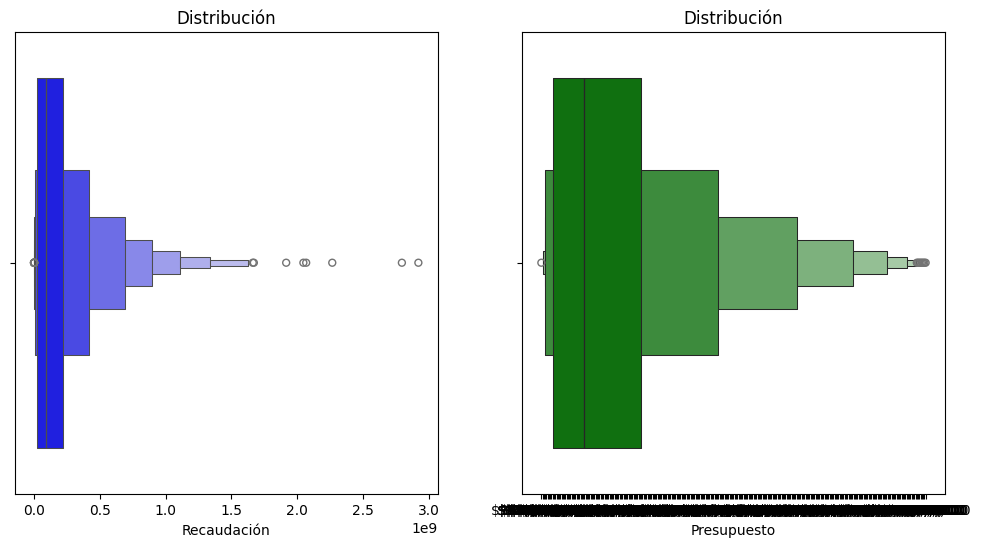

In [331]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

sns.boxenplot(x=movies322['Income'], ax=axes[0], color="blue")
axes[0].set_title("Distribución")
axes[0].set_xlabel("Recaudación")

sns.boxenplot(x=movies322['Budget'], ax=axes[1], color="green")
axes[1].set_title("Distribución")
axes[1].set_xlabel("Presupuesto")

In [332]:
movies322[(movies322['Income']>2000000000)|(movies322['Income']<11000)].sort_values('Income').head()

,Title,IMDB Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
396,"Yes, God, Yes",6.1,2019,July,R,78,Karen Maine,"Natalia Dyer, Timothy Simons, Wolfgang Novogratz, Francesca Reale","Comedy, Drama",Unknown,Unknown,305.0,United States
101,Farha,8.4,2021,December,TV-14,92,Darin J Sallam,"Karam Taher, Ashraf Barhom, Ali Suliman, Tala Gammoh",Drama,Jordan,Unknown,703.0,"Jordan, Saudi Arabia, Sweden"
1203,A Serbian Film,5.0,2010,June,NC-17,104,Srdjan Spasojevic,"Srdjan Zika Todorovic, Sergej Trifunovic, Jelena Gavrilovic, Slobodan Bestic","Horror, Mystery, Thriller",Serbia,Unknown,1541.0,Serbia
1176,Now & Later,5.1,2011,February,Unrated,99,Philippe Diaz,"Keller Wortham, Shari Solanis, Luis Fernandez Gil, Adrian Qui onez",Drama,USA,Unknown,1808.0,United States
1366,Blood and Bone,6.7,2009,September,R,93,Ben Ramsey,"Michael Jai White, Julian Sands, Eamonn Walker, Dante Basco","Action, Crime, Drama",USA,"$3,700,000",3492.0,United States


Una vez comprobados los datos de presupuesto y recaudacion de esta ds, no hay ningun valor atípico (mas allá de las peliculas mas caras y las que han tenido recaudaciones record, y las peliculas de producción 'casera' y poco conocidas). Sin embargo, el csv de db con un millon de datos lo enccontré después del estudio y limpieza de movies y movies322, y tras haberla contrastado, decidí centrarme en db pues tenia datos igual de fiables de miles de películas mas. 
En el notebook llamado Movies puedes encontrar una parte del análisis y limpieza que hice de las otras ds.

In [333]:
Q1 = moviesdb['revenue'].quantile(0.25)
Q3 = moviesdb['revenue'].quantile(0.75)
IQR = Q3 - Q1

liminf = Q1 - 1.5 * IQR
limsup = Q3 + 1.5 * IQR

# Identificar los valores atípicos
dbrevoutliers = moviesdb[(moviesdb['revenue'] < liminf) | (moviesdb['revenue'] > limsup)]
dbrevoutliers.describe()

,id,vote_average,vote_count,Year,revenue,runtime,budget,popularity
count,1.590400e+04,15904.000000,15904.000000,15904.000000,1.590400e+04,15904.000000,1.590400e+04,15904.000000
mean,2.368582e+05,5.909626,1023.926245,1948.896001,4.693197e+07,108.946177,1.526322e+07,14.549044
std,3.139149e+05,1.893296,2463.087947,324.210405,1.417199e+08,37.154834,3.316022e+07,50.165869
min,5.000000e+00,0.000000,0.000000,0.000000,1.000000e+00,61.000000,0.000000e+00,0.000000
25%,1.425550e+04,5.545000,21.000000,1994.000000,4.891900e+05,93.000000,0.000000e+00,3.000000
50%,6.786200e+04,6.289000,167.000000,2007.000000,5.000000e+06,103.000000,1.500000e+06,9.000000
75%,3.932715e+05,6.940000,818.000000,2015.000000,3.031010e+07,118.000000,1.500000e+07,16.000000
max,1.412564e+06,10.000000,34495.000000,2028.000000,5.000000e+09,999.000000,6.000000e+08,2994.000000


In [334]:
moviesdb['revenue'].describe(percentiles=[.25, .5, .75, .9, .99])

count    3.133200e+05
mean     2.382248e+06
std      3.354923e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
90%      0.000000e+00
99%      4.584497e+07
max      5.000000e+09
Name: revenue, dtype: float64

In [335]:
Q1 = moviesdb['runtime'].quantile(0.25)
Q3 = moviesdb['runtime'].quantile(0.75)
IQR = Q3 - Q1

run_liminf = Q1 - 1.5 * IQR
run_limsup = Q3 + 1.5 * IQR

# Identificar los valores atípicos
dbrunoutliers = moviesdb[(moviesdb['runtime'] < run_liminf) | (moviesdb['runtime'] > run_limsup)]
dbrunoutliers.describe()

,id,vote_average,vote_count,Year,revenue,runtime,budget,popularity
count,2.288900e+04,22889.000000,22889.000000,22889.000000,2.288900e+04,22889.000000,2.288900e+04,22889.000000
mean,5.999518e+05,3.026334,93.779545,1818.658832,5.524098e+06,197.181878,1.657528e+06,1.777535
std,4.182145e+05,3.508120,1081.671952,577.603825,7.532266e+07,127.168166,1.544609e+07,12.864421
min,1.300000e+01,0.000000,0.000000,0.000000,0.000000e+00,142.000000,0.000000e+00,0.000000
25%,2.579250e+05,0.000000,0.000000,1984.000000,0.000000e+00,150.000000,0.000000e+00,0.000000
50%,5.154910e+05,0.000000,0.000000,2006.000000,0.000000e+00,165.000000,0.000000e+00,0.000000
75%,9.697830e+05,6.500000,3.000000,2016.000000,0.000000e+00,191.000000,0.000000e+00,1.000000
max,1.412664e+06,10.000000,34495.000000,2028.000000,5.000000e+09,7200.000000,5.000000e+08,1175.000000


In [336]:
moviesdb['runtime'].describe(percentiles=[.25, .5, .75, .9, .99])

count    313320.000000
mean        101.008937
std          46.602274
min          61.000000
25%          84.000000
50%          93.000000
75%         107.000000
90%         132.000000
99%         240.000000
max        7200.000000
Name: runtime, dtype: float64

In [337]:
Q1 = moviesdb['budget'].quantile(0.25)
Q3 = moviesdb['budget'].quantile(0.75)
IQR = Q3 - Q1

bud_liminf = Q1 - 1.5 * IQR
bud_limsup = Q3 + 1.5 * IQR

# Identificar los valores atípicos
dbrunoutliers = moviesdb[(moviesdb['budget'] < bud_liminf) | (moviesdb['budget'] > bud_limsup)]
dbrunoutliers.describe()

,id,vote_average,vote_count,Year,revenue,runtime,budget,popularity
count,2.444700e+04,24447.000000,24447.000000,24447.000000,2.444700e+04,24447.000000,2.444700e+04,24447.000000
mean,3.716559e+05,4.713499,656.736082,1870.750890,2.864190e+07,103.966990,1.160288e+07,9.515360
std,4.041938e+05,2.809479,2047.001039,501.309153,1.160030e+08,40.358337,2.902244e+07,41.793289
min,5.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,61.000000,1.000000e+00,0.000000
25%,3.028750e+04,3.000000,1.000000,1996.000000,0.000000e+00,88.000000,5.000000e+04,0.000000
50%,2.284700e+05,5.705000,19.000000,2009.000000,0.000000e+00,97.000000,1.300000e+06,3.000000
75%,5.974285e+05,6.672000,294.500000,2016.000000,6.622450e+06,112.000000,9.567236e+06,12.000000
max,1.412704e+06,10.000000,34495.000000,2037.000000,5.000000e+09,1265.000000,8.880000e+08,2994.000000


In [338]:
moviesdb['budget'].describe(percentiles=[.25, .5, .75, .9, .99])

count    3.133200e+05
mean     9.053226e+05
std      8.683517e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
90%      0.000000e+00
99%      2.500000e+07
max      8.880000e+08
Name: budget, dtype: float64

Text(0.5, 0, 'Recaudación')

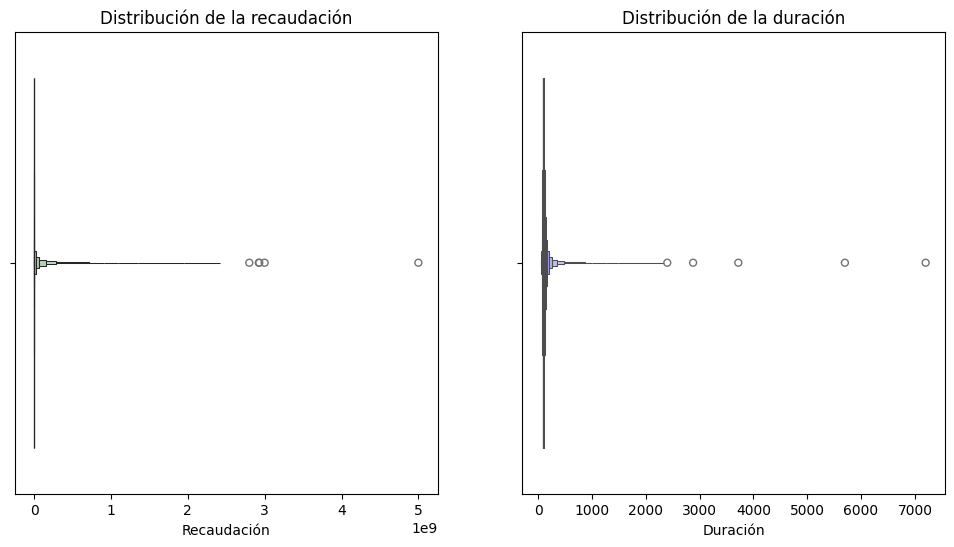

In [339]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
sns.boxenplot(x=moviesdb['runtime'], ax=axes[1], color="blue")
plt.title('Distr')
axes[1].set_title("Distribución de la duración")
axes[1].set_xlabel("Duración")

sns.boxenplot(x=moviesdb['revenue'], ax=axes[0], color="green")
axes[0].set_title("Distribución de la recaudación")
axes[0].set_xlabel("Recaudación")


Text(0.5, 1.0, 'Distribución del presupuesto')

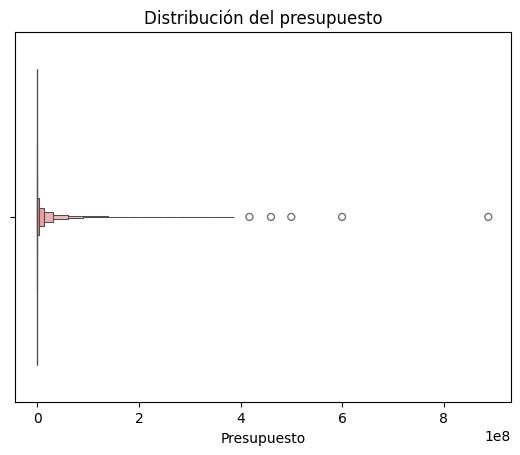

In [340]:
sns.boxenplot(x=moviesdb['budget'], color="red")
plt.xlabel('Presupuesto')
plt.title('Distribución del presupuesto')

Me presentan boxplots muy raros pero no sorprenden, pues incluye películas que no recaudaron nada, y otras que recaudaron mas de 3000 millones, y lo mismo en el presupuesto, con películas de produccion casera y peliculas de presupuesto record. 

In [341]:
moviesdb.sort_values('runtime',ascending=False).head()

,id,Title,vote_average,vote_count,status,Year,revenue,runtime,adult,budget,popularity,genres,production_countries,spoken_languages
299690,717019,Untitled #125 (Hickory),0.0,0,Released,2011,0,7200,False,0,0,NaN,NaN,NaN
265447,345985,Matrjoschka,0.0,0,Released,2006,0,5700,False,0,0,NaN,Germany,NaN
156345,206026,Giant 600 Cartoon Collection,6.0,1,Released,2008,0,3720,False,0,1,Animation,NaN,English
166851,294021,The Longest Most Meaningless Movie in the World,3.0,1,Released,1968,0,2880,False,0,0,NaN,United Kingdom,NaN
259511,392372,350 Classic Cartoons,0.0,0,Released,2008,0,2400,False,0,0,NaN,NaN,NaN


In [342]:
moviesdb[(moviesdb['runtime']>240)&(moviesdb['popularity']<=11)]


,id,Title,vote_average,vote_count,status,Year,revenue,runtime,adult,budget,popularity,genres,production_countries,spoken_languages
6476,11659,The Best of Youth,8.053,478,Released,2003,2693053,366,False,0,10,"Drama, History, Romance",Italy,"English, Italian, Norwegian"
10287,31414,Satantango,8.218,232,Released,1994,0,432,False,1500000,10,Drama,"Germany, Hungary, Switzerland",Hungarian
10628,22137,The Kingdom,7.690,221,Released,1994,0,277,False,1500000,6,"Mystery, Horror, Comedy, Drama",Denmark,"Danish, Swedish"
12425,43434,Carlos,6.959,171,Released,2010,871279,339,False,18000000,8,"Crime, Drama, Thriller, History","Germany, France","French, German, English, Spanish, Arabic, Hungarian, Japanese, Russian"
12438,5998,"Dr. Mabuse, the Gambler",7.646,171,Released,1922,0,271,False,0,8,"Crime, Thriller",Germany,No Language
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314346,753804,Ambassador Magma,0.000,0,Released,1993,0,325,False,0,0,NaN,Japan,Japanese
314398,753308,Taira no Kiyomori,0.000,0,Released,1992,0,244,False,0,0,"History, Drama",Japan,Japanese
314426,753543,Shadow Warrior Tokugawa Ieyasu,0.000,0,Released,2014,0,250,False,0,0,"Drama, History",Japan,Japanese
314519,754745,The Public Image Is Rotten: Songs From The Heart,0.000,0,Released,2018,0,270,False,0,0,Music,United Kingdom,English


In [343]:
mascaralargas= ((moviesdb['runtime']>240)&(moviesdb['popularity']<=10))
moviesdb=moviesdb[~mascaralargas]

In [344]:
moviesdb['popularity'].describe(percentiles=[.25, .5, .75, .95, .99])

count    310550.000000
mean          2.078651
std          13.200968
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
95%           9.000000
99%          23.000000
max        2994.000000
Name: popularity, dtype: float64

In [345]:
moviesdb[(moviesdb['popularity']==0)&(moviesdb['revenue']>0)].sort_values('popularity',ascending=False)

,id,Title,vote_average,vote_count,status,Year,revenue,runtime,adult,budget,popularity,genres,production_countries,spoken_languages
314350,753853,Vetrivel Sakthivel,0.000,0,Released,2005,300000,155,False,272734,0,"Comedy, Family",India,Tamil
865,12477,Grave of the Fireflies,8.455,4861,Released,1988,516962,89,False,3700000,0,"Animation, Drama, War",Japan,Japanese
3465,11454,Manhunter,7.000,1169,Released,1986,8620929,120,False,15000000,0,"Crime, Horror, Thriller",United States of America,English
6541,203819,Tracks,6.918,472,Released,2013,4878242,112,False,0,0,"Adventure, Drama",Australia,English
8500,203793,Stalingrad,6.530,312,Released,2013,68129518,131,False,30000000,0,"War, Action, Drama",Russia,"German, Russian"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52556,225335,Porcelain Horse,6.100,14,Released,2012,500,100,False,0,0,Drama,Ecuador,Spanish
49721,436835,Dying,4.400,15,Released,2017,29189,104,False,0,0,Drama,Spain,Spanish
49290,497721,Zombiebox,3.600,15,Released,2018,3004952,62,False,0,0,Comedy,Russia,Russian
49070,604165,Kamen Rider Zi-O the Movie: Over Quartzer,6.813,16,Released,2019,5530199,67,False,0,0,"Action, Adventure, Science Fiction, Drama",Japan,Japanese


In [346]:
moviesdb=moviesdb[(moviesdb['vote_count']>1)|((moviesdb['popularity']==0)&(moviesdb['revenue']>0))]
print(moviesdb.shape)
moviesdb['popularity'].describe(percentiles=[.25, .5, .75, .95, .99])

(144343, 14)


count    144343.000000
mean          4.094857
std          19.099779
min           0.000000
25%           1.000000
50%           1.000000
75%           4.000000
95%          14.000000
99%          35.000000
max        2994.000000
Name: popularity, dtype: float64

In [347]:
moviesdb[moviesdb['popularity']>500].sort_values('popularity',ascending=False).head(5)

,id,Title,vote_average,vote_count,status,Year,revenue,runtime,adult,budget,popularity,genres,production_countries,spoken_languages
3841,565770,Blue Beetle,7.139,1023,Released,2023,124818235,128,False,120000000,2994,"Action, Science Fiction, Adventure",United States of America,"English, Portuguese, Spanish"
4973,980489,Gran Turismo,8.068,702,Released,2023,114800000,135,False,60000000,2680,"Action, Drama, Adventure",United States of America,"English, German, Japanese"
7718,968051,The Nun II,6.545,365,Released,2023,231200000,110,False,38500000,1692,"Horror, Mystery, Thriller",United States of America,"English, French"
2128,615656,Meg 2: The Trench,6.912,2034,Released,2023,384056482,116,False,129000000,1567,"Action, Science Fiction, Horror","China, United States of America",English
9609,762430,Retribution,6.816,258,Released,2023,12905464,91,False,20000000,1547,"Action, Mystery, Thriller, Crime","France, United States of America","English, German"


Por lo que veo, la popularidad no es muy objetivo (y por tanto fiable a nivel cuantitativo) pues me extraña que, estando el DS ordenado por numero de votos, entre las peliculas con mayor popularidad no haya ninguna de las 1000 que mas votos han recibido, y haya tantas a priori muy poco conocidas y de "mercados" pequeños como Nigeria o Islandia. Para tratar de aumentar su fiabilidad, voy a modificar los valores superiores al percentil 99 para tratar de equilibrarla un poco.

In [348]:
moviesdb.loc[moviesdb['popularity'] > 1000, 'popularity'] = moviesdb['popularity'] / 10


/var/folders/3z/73lxqgp11kb61sfk787_46800000gn/T/ipykernel_85907/1987027653.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[106.9 117.5 100.8 156.7 299.4 145.8 268.  111.1 169.2 154.7]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  moviesdb.loc[moviesdb['popularity'] > 1000, 'popularity'] = moviesdb['popularity'] / 10


In [349]:
moviesdb['popularity'].describe()

count    144343.000000
mean          3.993218
std          12.436504
min           0.000000
25%           1.000000
50%           1.000000
75%           4.000000
max         982.000000
Name: popularity, dtype: float64

Incluso con la modificacion carece de utilidad pues ademas de lo observado, el percentil 50 no sube del valor 1. Me ha valido para quitarme los volúmenes y sagas agrupadas que se incluian como películas, pero no voy a darle mas uso.

Tampoco me puedo fiar por presupuesto pues a tiene algunos errores y valores no esperados, como películas de grandes estudios a las que asigna un presupuesto de 0$. El CSV esta ordenado por nº de votos por lo que voy a probar con esa variable.

In [350]:
print(moviesdb.shape)
moviesdb['vote_count'].describe(percentiles=[.10,.25,.5,.6,.85,.9,.95,.98])

(144343, 14)


count    144343.000000
mean        141.635209
std         883.397494
min           0.000000
10%           2.000000
25%           3.000000
50%           8.000000
60%          12.000000
85%          66.000000
90%         133.800000
95%         405.000000
98%        1444.160000
max       34495.000000
Name: vote_count, dtype: float64

In [351]:
moviesdb[(moviesdb['vote_count']<66)].sort_values('vote_count',ascending=False).head(10)

,id,Title,vote_average,vote_count,status,Year,revenue,runtime,adult,budget,popularity,genres,production_countries,spoken_languages
21874,43487,No Regrets for Our Youth,6.838,65,Released,1946,0,110,False,0,6.0,Drama,Japan,Japanese
21857,11701,Grilled,5.000,65,Released,2006,0,83,False,0,5.0,"Drama, Action, Comedy",United States of America,English
21899,282268,Monty Python Live (Mostly),6.915,65,Released,2014,0,138,False,0,4.0,"Comedy, Music",United Kingdom,"English, Spanish"
21887,427253,Black Hollow Cage,5.877,65,Released,2017,0,116,False,0,4.0,"Thriller, Science Fiction, Drama, Horror",Spain,English
21870,37959,GO,7.215,65,Released,2001,0,122,False,0,7.0,"Drama, Romance",Japan,"Japanese, Korean"
21871,41496,A Dog Year,6.100,65,Released,2009,0,80,False,0,5.0,"Comedy, Drama",NaN,"English, German"
21914,530284,Teen Bride,8.200,65,Released,2017,0,104,False,0,5.0,"Romance, Drama, Comedy",Japan,Japanese
21913,14902,1776,6.977,65,Released,1972,2800000,180,False,6000000,11.0,"Drama, History",United States of America,English
21912,33250,Real Life,6.569,65,Released,1979,0,99,False,0,5.0,Comedy,United States of America,English
21911,613098,Undercover Wedding Crashers,6.254,65,Released,2021,0,90,False,0,5.0,Comedy,Spain,Spanish


In [352]:
conteo_generosnom=oscars['Movie Genre'].str.split(',').explode().replace({
    'Musical': 'Música',
    'Music':'Música',
    'Film-Noir': 'Crimen',
    'Comedy':'Comedia',
    'Crime':'Crimen',
    'War': 'Acción',
    'Adventure':'Acción',
    'Family':'Familiar',
    'Action':'Acción',
    'Mystery':'Thriller',
    'History':'Historia/Bio',
    'Biography': 'Historia/Bio',
    'Fantasy':'Fantasia',
    'Sport':'Deporte',
    'Horror':'Otros',
    'Animation':'Otros',
    }).value_counts()


In [353]:
oscarwinners=oscars[oscars['Award']=='Winner']
conteo_generosw=oscarwinners['Movie Genre'].str.split(',').explode().replace({
    'Musical': 'Música',
    'Music':'Música',
    'Film-Noir': 'Crimen',
    'Comedy':'Comedia',
    'Crime':'Crimen',
    'War': 'Acción',
    'Adventure':'Acción',
    'Family':'Familiar',
    'Action':'Acción',
    'Mystery':'Thriller',
    'History':'Historia/Bio',
    'Biography': 'Historia/Bio',
    'Fantasy':'Fantasia',
    'Sport':'Deporte',
    }).value_counts()

In [354]:
oscarwinners1=oscarwinners.copy()
oscarwinners1['Movie Genre']=oscarwinners['Movie Genre'].apply(lambda x: x.split(',')[0])
conteo_oscargenprincipal=oscarwinners1['Movie Genre'].value_counts()
conteo_oscargenprincipal

Movie Genre
Drama        41
Biography    18
Comedy       13
Adventure     9
Crime         9
Action        3
Name: count, dtype: int64

Como el csv de los Oscar lo he obtenido de la Academia no voy a limpiarla en exceso pues es una fuente fiable y no voy a atender a las variables numericas sino unicamente el tipo de galardón y el nombre, género y año de la película. Así, la unica limpieza o modificación que he hecho es separar los generos de forma individual y quedarme con el principal en una de ellas, para hacer diferentes graficos.

-----

Para la representacion y la creación de graficos voy a crear diferentes mascaras de db para poder exponer diferentes gráficos, con por ejemplo, las peliculas populares que mas han duran, las peliculas españolas que mas han recaudado, etc.

In [355]:
movies_=pd.merge(movies,movies22,on=['Title','Year'],how='outer')
movies_['Runtime_x']=movies_['Runtime_x'].fillna(movies_['Runtime_y'])
movies_['genres']=movies_['genres'].fillna(movies_['Genre'])
movies_.drop(columns={'Runtime_y','Genre'},inplace=True)


In [356]:
movies_largas=movies_[(movies_['Runtime_x']>180)&((movies['popularity']>8)|(movies_['IMDB Rating']>3))]
movies_largas.sort_values('Year',ascending=False).head()


,index,budget,genres,popularity,production_countries,Year,revenue,Runtime_x,Title,IMDB Rating,Budget,Income,Country_of_origin
411,NaN,NaN,"Action, Adventure, Fantasy",NaN,NaN,2022,NaN,192,Avatar: The Way of Water,7.8,"$350,000,000","$2,267,946,983",United States
426,NaN,NaN,"Comedy, Drama, History",NaN,NaN,2022,NaN,188,Babylon,7.3,"$78,000,000","$61,851,455",United States
2982,NaN,NaN,"Action, Drama",NaN,NaN,2022,NaN,187,RRR,7.9,"₹3,500,000,000","$102,973,162",India
4183,NaN,NaN,"Biography, Crime, Drama",NaN,NaN,2019,NaN,209,The Irishman,7.8,"$159,000,000","$968,853",United States
413,NaN,NaN,"Action, Adventure, Drama",NaN,NaN,2019,NaN,181,Avengers: Endgame,8.4,"$356,000,000","$2,797,501,328",United States


In [357]:
print(moviesdb.shape)
print(moviesdb.isnull().sum())
print(movies_.shape)
print(movies_.isnull().sum())

(144343, 14)
id                          0
Title                       0
vote_average                0
vote_count                  0
status                      0
Year                        0
revenue                     0
runtime                     0
adult                       0
budget                      0
popularity                  0
genres                   8275
production_countries    15215
spoken_languages         9625
dtype: int64
(5216, 13)
index                    956
budget                   956
genres                     0
popularity               956
production_countries     956
Year                       0
revenue                  956
Runtime_x                  0
Title                      0
IMDB Rating             3218
Budget                  3522
Income                  3361
Country_of_origin       3218
dtype: int64


In [358]:
print(moviesdb.shape)
print(moviesdb[moviesdb['revenue']==0].shape)
print(moviesdb[moviesdb['runtime']==0].shape)
print(moviesdb[moviesdb['budget']==0].shape)

(144343, 14)
(128867, 14)
(0, 14)
(126137, 14)


In [359]:
moviesdb_=pd.merge(moviesdb,movies_, on=['Title','Year'], how='outer')
print(moviesdb_.shape)
moviesdb_.head()

(144681, 25)


,id,Title,vote_average,vote_count,status,Year,revenue_x,runtime,adult,budget_x,...,budget_y,genres_y,popularity_y,production_countries_y,revenue_y,Runtime_x,IMDB Rating,Budget,Income,Country_of_origin
0,627427.0,"""Concordia"" Team",6.000,2.0,Released,1981,0.0,88.0,False,0.0,...,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN
1,372807.0,"""Golden Sand"" Sword",4.500,2.0,Released,1969,0.0,91.0,False,0.0,...,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN
2,932268.0,"""Renjou"" Keishichou Kyoukouhan-gakari Higuchi Akira",9.000,1.0,Released,2022,1.0,95.0,False,0.0,...,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN
3,381915.0,"""Weird Al"" Yankovic: The Ultimate Video Collection",8.167,6.0,Released,2003,0.0,90.0,False,0.0,...,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN
4,41371.0,#1 Cheerleader Camp,4.782,85.0,Released,2010,0.0,95.0,False,0.0,...,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN


In [360]:
moviesdb_['revenue_x']=moviesdb_['revenue_x'].replace(0,pd.NA)
moviesdb_['revenue_x']=moviesdb_['revenue_x'].fillna(moviesdb_['revenue_y'])
moviesdb_['runtime']=moviesdb_['runtime'].replace(0,pd.NA)
moviesdb_['runtime']=moviesdb_['runtime'].fillna(moviesdb_['Runtime_x'])
moviesdb_['budget_x']=moviesdb_['budget_x'].replace(0,pd.NA)
moviesdb_['budget_x']=moviesdb_['budget_x'].fillna(moviesdb_['budget_y'])
moviesdb_['genres_x']=moviesdb_['genres_x'].fillna(moviesdb_['genres_y'])
moviesdb_['vote_average']=moviesdb_['genres_x'].fillna(moviesdb_['IMDB Rating'])
moviesdb_['popularity_x']=moviesdb_['popularity_x'].replace(0,pd.NA)
moviesdb_['popularity_x']=moviesdb_['popularity_x'].fillna(moviesdb_['popularity_y'])
moviesdb_['production_countries_x']=moviesdb_['production_countries_x'].fillna(moviesdb_['production_countries_y'])
moviesdb_.drop(columns=['revenue_y','budget_y','Runtime_x','popularity_y','production_countries_y','genres_y','index','IMDB Rating'],inplace=True)
print(moviesdb_.isnull().sum())
print(moviesdb_.shape)

/var/folders/3z/73lxqgp11kb61sfk787_46800000gn/T/ipykernel_85907/2897833725.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  moviesdb_['revenue_x']=moviesdb_['revenue_x'].fillna(moviesdb_['revenue_y'])
/var/folders/3z/73lxqgp11kb61sfk787_46800000gn/T/ipykernel_85907/2897833725.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  moviesdb_['budget_x']=moviesdb_['budget_x'].fillna(moviesdb_['budget_y'])


id                           338
Title                          0
vote_average                8271
vote_count                   338
status                       338
Year                           0
revenue_x                 128444
runtime                        0
adult                        338
budget_x                  125884
popularity_x               30618
genres_x                    8271
production_countries_x     15333
spoken_languages            9963
Budget                    142968
Income                    142802
Country_of_origin         142657
dtype: int64
(144681, 17)


/var/folders/3z/73lxqgp11kb61sfk787_46800000gn/T/ipykernel_85907/2897833725.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  moviesdb_['popularity_x']=moviesdb_['popularity_x'].fillna(moviesdb_['popularity_y'])


In [361]:
print(moviesdb_.shape)
print(moviesdb_[moviesdb_['revenue_x']==0].shape)
print(moviesdb_[moviesdb_['runtime']==0].shape)
print(moviesdb_[moviesdb_['budget_x']==0].shape)

(144681, 17)
(608, 17)
(0, 17)
(417, 17)


In [362]:
moviesdb_['decade'] = (moviesdb_['Year'] // 10 * 10).astype(int).astype(str) + "s"
moviesdb_['decade_numeric'] = moviesdb_['Year'] // 10 * 10


In [415]:
moviesdb[moviesdb['runtime']>180]
db180p=moviesdb_[(moviesdb_['runtime']>180)&(moviesdb_['popularity_x']>20)]
dbpp=moviesdb_[(moviesdb_['vote_count']>133)]
dbpop=moviesdb_[(moviesdb_['vote_count']>1000)]
dbesp=moviesdb_[moviesdb_['production_countries_x'].astype(str).str.contains('Spain')]
dbpop['Year'].value_counts().sort_index().index

Index([1920, 1921, 1922, 1925, 1926, 1927, 1931, 1932, 1933, 1934, 1936, 1937,
       1939, 1940, 1941, 1942, 1943, 1944, 1946, 1948, 1949, 1950, 1951, 1952,
       1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
      dtype='int64', name='Year')

In [417]:
dbpop.loc['decade'] = (dbpop['Year'] // 10 * 10).astype(int).astype(str) + "s"
dbpop.loc['decade_numeric'] = dbpop['Year'] // 10 * 10

/var/folders/3z/73lxqgp11kb61sfk787_46800000gn/T/ipykernel_85907/3222600199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbpop.loc['decade'] = (dbpop['Year'] // 10 * 10).astype(int).astype(str) + "s"
/var/folders/3z/73lxqgp11kb61sfk787_46800000gn/T/ipykernel_85907/3222600199.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbpop.loc['decade_numeric'] = dbpop['Year'] // 10 * 10


In [365]:
moviesdb.shape

(144343, 14)

In [418]:
dbpop.sort_values('runtime',ascending=False).head(10)

,id,Title,vote_average,vote_count,status,Year,revenue_x,runtime,adult,budget_x,popularity_x,genres_x,production_countries_x,spoken_languages,Budget,Income,Country_of_origin,decade,decade_numeric
24034,8095.0,Cleopatra,"Drama, History, Romance",1053.0,Released,1963.0,71000000.0,248.0,False,44000000.0,20.0,"Drama, History, Romance","United States of America, United Kingdom, Switzerland",English,NaN,NaN,NaN,1960s,1960.0
143525,791373.0,Zack Snyder's Justice League,"Action, Adventure, Fantasy",9202.0,Released,2021.0,NaN,242.0,False,70000000.0,130.0,"Action, Adventure, Fantasy",United States of America,English,"$300,000,000",<NA>,United States,2020s,2020.0
45480,770.0,Gone with the Wind,"Drama, War, Romance",3691.0,Released,1939.0,402352579.0,238.0,False,4000000.0,46.0,"Drama, War, Romance",United States of America,English,NaN,NaN,NaN,1930s,1930.0
81371,311.0,Once Upon a Time in America,"Drama, Crime",4863.0,Released,1984.0,5500000.0,229.0,False,30000000.0,42.0,"Drama, Crime","United States of America, Italy","English, French, Hebrew, Italian, Yiddish",NaN,NaN,NaN,1980s,1980.0
63458,947.0,Lawrence of Arabia,"Adventure, Drama, History, War",2689.0,Released,1962.0,69995385.0,228.0,False,15000000.0,24.0,"Adventure, Drama, History, War",United Kingdom,"English, Arabic, Turkish",NaN,NaN,NaN,1960s,1960.0
14591,665.0,Ben-Hur,"Action, Drama, History, Adventure",2465.0,Released,1959.0,164000000.0,222.0,False,15000000.0,33.0,"Action, Drama, History, Adventure",United States of America,English,NaN,NaN,NaN,1950s,1950.0
126737,6844.0,The Ten Commandments,"Drama, History",1400.0,Released,1956.0,122700000.0,220.0,False,13000000.0,38.0,"Drama, History",United States of America,English,NaN,NaN,NaN,1950s,1950.0
116865,398978.0,The Irishman,"Crime, Drama, History",6203.0,Released,2019.0,968853.0,209.0,False,159000000.0,23.0,"Crime, Drama, History",United States of America,"English, Italian, Latin, Spanish","$159,000,000","$968,853",United States,2010s,2010.0
96309,346.0,Seven Samurai,"Action, Drama",3230.0,Released,1954.0,346300.0,207.0,False,2000000.0,36.0,"Action, Drama",Japan,Japanese,NaN,NaN,NaN,1950s,1950.0
69437,1883.0,Malcolm X,"Drama, History",1489.0,Released,1992.0,48169908.0,202.0,False,34000000.0,18.0,"Drama, History",United States of America,"Arabic, English",NaN,NaN,NaN,1990s,1990.0


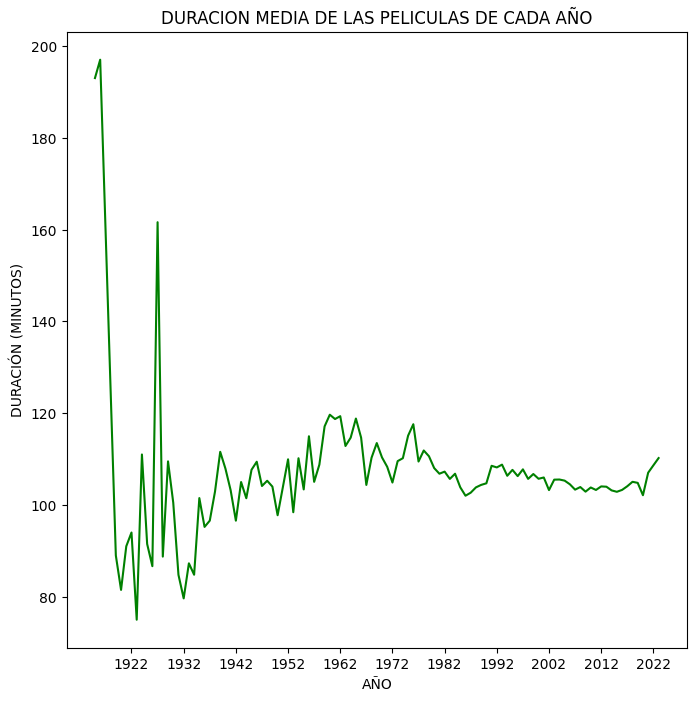

In [419]:
plt.figure(figsize=(8,8))
sns.lineplot(dbpp.groupby('Year')['runtime'].mean(),color='green')
plt.title('DURACION MEDIA DE LAS PELICULAS DE CADA AÑO')
plt.ylabel('DURACIÓN (MINUTOS)')
plt.xlabel('AÑO')
plt.xticks(ticks=range(1922,2032,10))
plt.show()

In [368]:
dbpop.groupby('Year')['runtime'].max().sort_values().index[-2]

np.int64(2021)

In [420]:
dbpmax = dbpp['runtime'].max()
dbpmaxyear = dbpp[dbpp['runtime'] == dbpmax]['Year'].values[0]
dbpmaxtitle = dbpp[dbpp['runtime'] == dbpmax]['Title'].values[0]
dbpmin = (dbpp.groupby('Year')['runtime'].max()).min()
dbpminyear = dbpp[dbpp['runtime'] == dbpmin]['Year'].values[0]
dbpmintitle = dbpp[dbpp['runtime'] == dbpmin]['Title'].values[0]
dbp2max = dbpp['runtime'].nlargest(2).iloc[-1]
dbp2maxyear = dbpp[dbpp['runtime'] == dbp2max]['Year'].values[0]
dbp2maxtitle = dbpp[dbpp['runtime'] == dbp2max]['Title'].values[0]
dbp3max = dbpp['runtime'].nlargest(3).iloc[-1]
dbp3maxyear = dbpp[dbpp['runtime'] == dbp3max]['Year'].values[0]
dbp3maxtitle = dbpp[dbpp['runtime'] == dbp3max]['Title'].values[0]


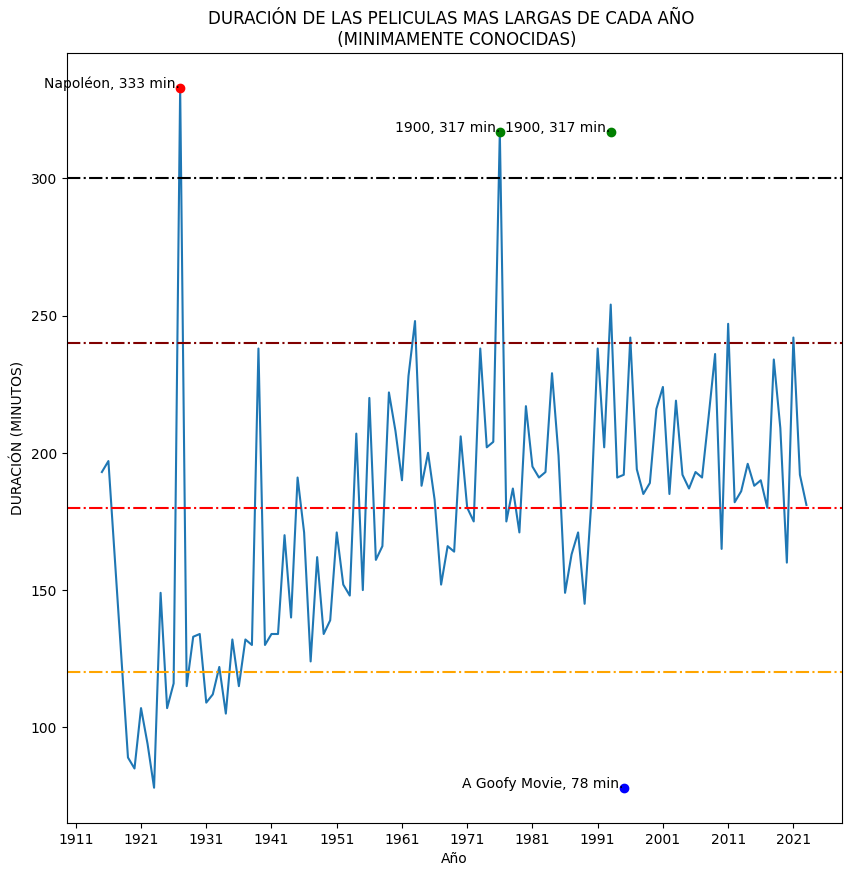

In [421]:
plt.figure(figsize=(10,10))
sns.lineplot(dbpp.groupby('Year')['runtime'].max())
plt.title('DURACIÓN DE LAS PELICULAS MAS LARGAS DE CADA AÑO \n (MINIMAMENTE CONOCIDAS)')
plt.ylabel('DURACIÓN (MINUTOS)')
plt.xlabel('Año')
plt.xticks(ticks=range(1911,2031,10))
plt.axhline(y=180, color='red', linestyle='dashdot',)
plt.axhline(y=120, color='orange', linestyle='dashdot')
plt.axhline(y=240, color='maroon', linestyle='dashdot')
plt.axhline(y=300, color='black', linestyle='dashdot')
plt.text(dbpmaxyear, dbpmax, f'{dbpmaxtitle}, {int(dbpmax)} min.', horizontalalignment='right')
plt.plot(dbpmaxyear, dbpmax, 'ro')
plt.text(dbp2maxyear, dbp2max, f'{dbp2maxtitle}, {int(dbp2max)} min.', horizontalalignment='right')
plt.plot(dbp2maxyear, dbp2max, 'go')
plt.text(dbp3maxyear, dbp2max, f'{dbp2maxtitle}, {int(dbp2max)} min.', horizontalalignment='right')
plt.plot(dbp3maxyear, dbp2max, 'go') 
plt.text(dbpminyear, dbpmin, f'{dbpmintitle}, {int(dbpmin)} min.', horizontalalignment='right')
plt.plot(dbpminyear, dbpmin, 'bo')  
plt.show()

In [422]:
dbpop.groupby('Year')['runtime'].max().sort_values().head(-1)

Year
1932.0     66.0
1921.0     68.0
1942.0     70.0
1920.0     78.0
1926.0     79.0
          ...  
1959.0    222.0
1962.0    228.0
1984.0    229.0
1939.0    238.0
2021.0    242.0
Name: runtime, Length: 94, dtype: Float64

In [423]:
dbmax = dbpop['runtime'].max()
dbmaxyear = dbpop[dbpop['runtime'] == dbmax]['Year'].values[0]
dbmaxtitle = dbpop[dbpop['runtime'] == dbmax]['Title'].values[0]
dbmin = (dbpop.groupby('Year')['runtime'].max()).min()
dbminyear = dbpop[dbpop['runtime'] == dbmin]['Year'].values[0]
dbmintitle = dbpop[dbpop['runtime'] == dbmin]['Title'].values[0]
db2max = dbpop['runtime'].nlargest(2).iloc[-1]
db2maxyear = dbpop[dbpop['runtime'] == db2max]['Year'].values[0]
db2maxtitle = dbpop[dbpop['runtime'] == db2max]['Title'].values[0]
db3max = dbpop['runtime'].nlargest(3).iloc[-1]
db3maxyear = dbpop[dbpop['runtime'] == db3max]['Year'].values[0]
db3maxtitle = dbpop[dbpop['runtime'] == db3max]['Title'].values[0]


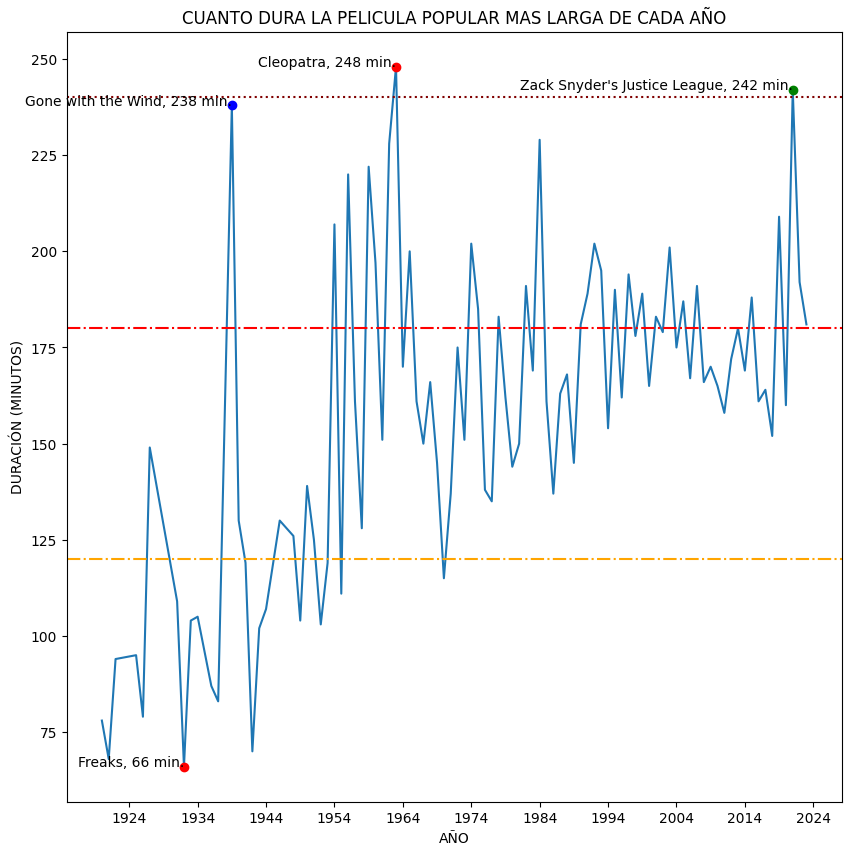

In [424]:
plt.figure(figsize=(10,10))
sns.lineplot(data=dbpop.groupby('Year')['runtime'].max())
plt.title('CUANTO DURA LA PELICULA POPULAR MAS LARGA DE CADA AÑO')
plt.ylabel('DURACIÓN (MINUTOS)')
plt.xlabel('AÑO')
plt.xticks(ticks=range(1904,2034,10))
plt.axhline(y=180, color='red', linestyle='dashdot')
plt.axhline(y=120, color='orange', linestyle='dashdot')
plt.axhline(y=240, color='maroon', linestyle='dotted')
plt.text(dbmaxyear, dbmax, f'{dbmaxtitle}, {int(dbmax)} min.', horizontalalignment='right')
plt.plot(dbmaxyear, dbmax, 'ro')
plt.text(dbminyear, dbmin, f'{dbmintitle}, {int(dbmin)} min.', horizontalalignment='right')
plt.plot(dbminyear, dbmin, 'ro')
plt.text(db2maxyear, db2max, f'{db2maxtitle}, {int(db2max)} min.', horizontalalignment='right')
plt.plot(db2maxyear, db2max, 'go') 
plt.text(db3maxyear, db3max, f'{db3maxtitle}, {int(db3max)} min.', horizontalalignment='right')
plt.plot(db3maxyear, db3max, 'bo')  
plt.show()


In [425]:
dbpop.groupby('Year')['id'].count()

Year
1920.0      1
1921.0      1
1922.0      1
1925.0      2
1926.0      1
         ... 
2019.0    165
2020.0     92
2021.0    114
2022.0     87
2023.0     39
Name: id, Length: 95, dtype: int64

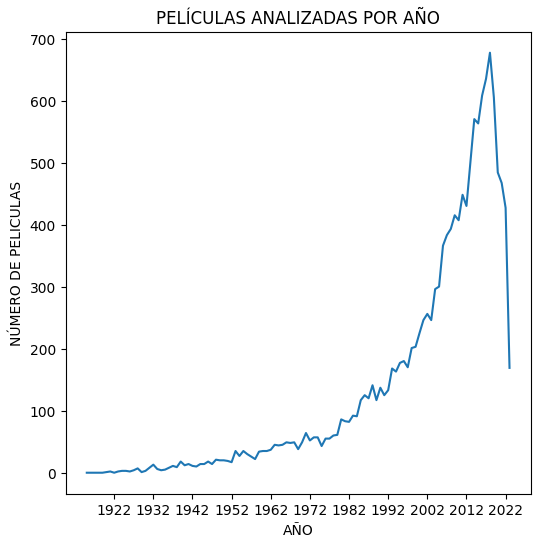

In [426]:
plt.figure(figsize=(6,6))
sns.lineplot(dbpp.groupby('Year')['Title'].count())
plt.title('PELÍCULAS ANALIZADAS POR AÑO')
plt.ylabel('NÚMERO DE PELICULAS')
plt.xlabel('AÑO')
plt.xticks(ticks=range(1922,2032,10))
plt.show()

In [427]:
dbesp['Year']=dbesp['Year'].replace(0,pd.NA)


/var/folders/3z/73lxqgp11kb61sfk787_46800000gn/T/ipykernel_85907/411483020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbesp['Year']=dbesp['Year'].replace(0,pd.NA)


In [428]:
dbesp['Year'].value_counts().sort_index().index

Index([1917, 1919, 1923, 1924, 1926, 1927, 1928, 1929, 1930, 1934, 1935, 1936,
       1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022, 2023],
      dtype='object', name='Year')

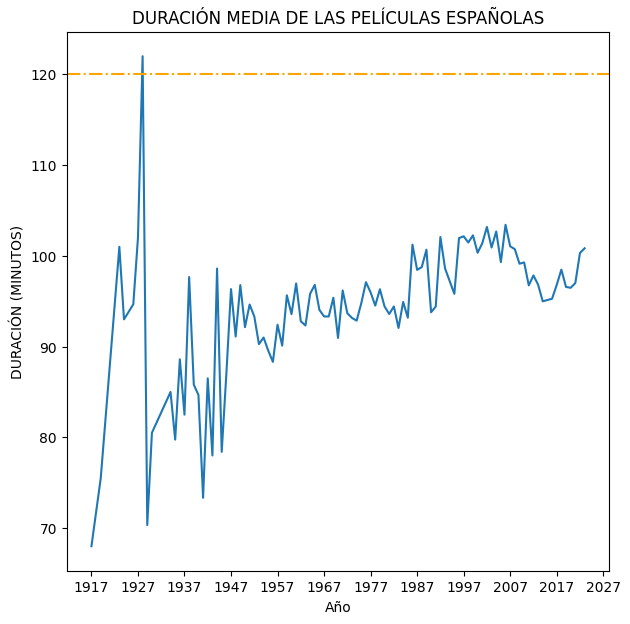

In [429]:
plt.figure(figsize=(7,7))
sns.lineplot(dbesp.groupby('Year')['runtime'].mean())
plt.title('DURACIÓN MEDIA DE LAS PELÍCULAS ESPAÑOLAS')
plt.ylabel('DURACIÓN (MINUTOS)')
plt.xlabel('Año')
plt.axhline(y=120, color='orange', linestyle='dashdot')
plt.xticks(ticks=range(1917,2037,10));

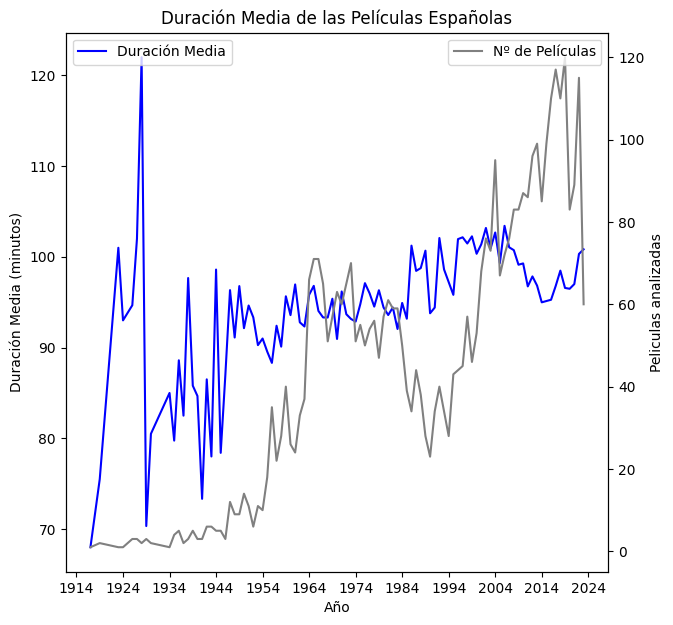

In [430]:
duracion_media = dbesp.groupby('Year')['runtime'].mean()
num_peliculas = dbesp['Year'].value_counts().sort_index()

plt.figure(figsize=(7, 7))
sns.lineplot(x=duracion_media.index, y=duracion_media.values, label='Duración Media', color='blue')
plt.title('Duración Media de las Películas Españolas')
plt.ylabel('Duración Media (minutos)')
plt.xlabel('Año')
plt.xticks(ticks=range(1914, 2034, 10))
plt.legend(loc='upper left')

ax2 = plt.gca().twinx() 
sns.lineplot(x=num_peliculas.index, y=num_peliculas.values, label='Nº de Películas', ax=ax2, color='grey')
ax2.set_ylabel('Peliculas analizadas')
ax2.legend(loc='upper right')

# Mostrar el gráfico
plt.show()


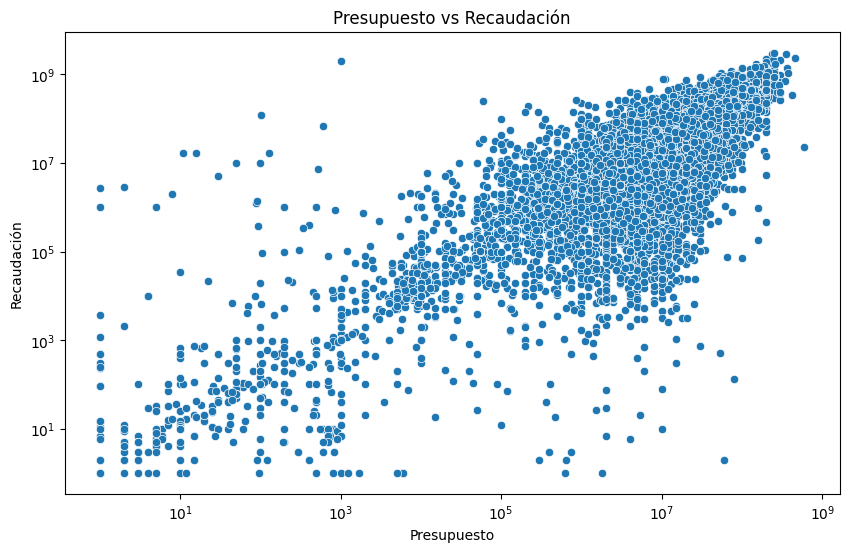

In [431]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=moviesdb, x='budget', y='revenue')
plt.title('Presupuesto vs Recaudación')
plt.xlabel('Presupuesto')
plt.ylabel('Recaudación')
plt.xscale('log')
plt.yscale('log')
plt.show()



<Axes: xlabel='revenue_x', ylabel='runtime'>

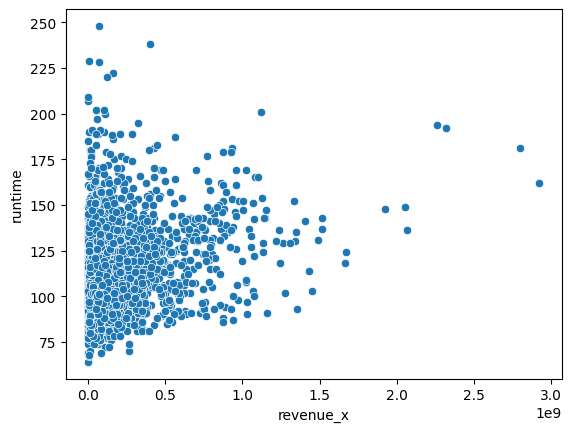

In [434]:
sns.scatterplot(x=dbpop['revenue_x'],y=dbpop['runtime'],sizes=(10,500))


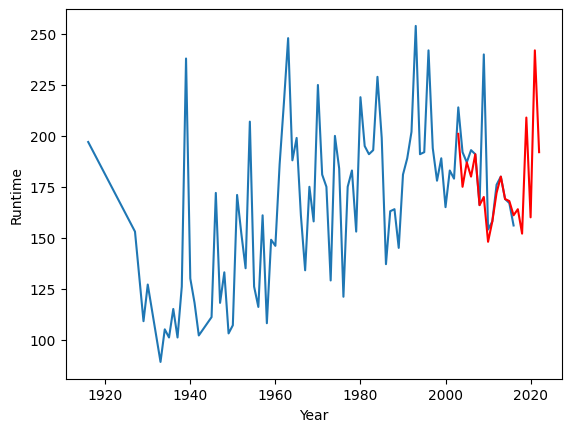

In [435]:
sns.lineplot(movies.groupby('Year')['Runtime'].max())
sns.lineplot(movies22.groupby('Year')['Runtime'].max(),color='red')
plt.show()

Y tras todo esta limpieza y analisis de este ds, se ve que no hay nada apreciable. A ver si combinandolo con la otra ds consigo algo.

Voy a intentar rellenar los valores erroneos y los nans juntando todas

A ver si combinando los ds puedo rellenar algunos ceros, y de paso convertir los que no limpie en nans para que no me afecten al estudio.

El tamaño me permite entender que la fusion ha funcionado para alrededor de 4000 películas, de las 5200 que habia en movies_, buenos numeros.
Ahora voy a intentar rellenar nans y ceros de la original db, con las otras

Poco he limpiado, y aun habiendo convertido los 0 en nulls, sigue habiendo 0. Voy a añadir una columna de decadas para los tonos y colores en los graficos de correlaciones que voy a hacer.

In [436]:
dbpop.shape

(3908, 19)

(60000, 10000000000)

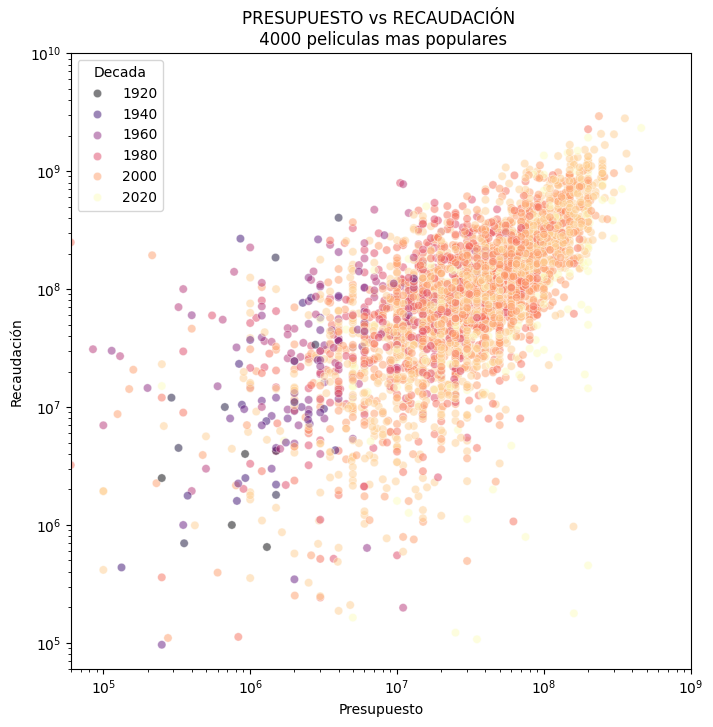

In [438]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=dbpop, x='budget_x', y='revenue_x', hue='decade_numeric', palette='magma', hue_norm=(dbpop['decade_numeric'].min(), dbpop['decade_numeric'].max()), alpha=0.5)
plt.title('PRESUPUESTO vs RECAUDACIÓN \n 4000 peliculas mas populares')
plt.xlabel('Presupuesto')
plt.ylabel('Recaudación')
plt.legend(title='Decada')
plt.xscale('log')
plt.yscale('log')
plt.xlim(60000,1000000000)
plt.ylim(60000,10000000000)

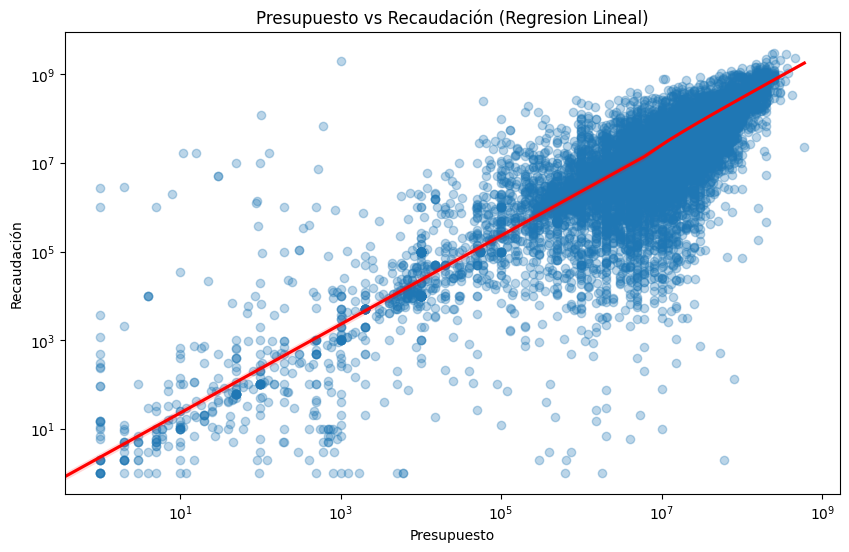

In [439]:
plt.figure(figsize=(10, 6))
sns.regplot(data=moviesdb_, x='budget_x', y='revenue_x',scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Presupuesto vs Recaudación (Regresion Lineal)')
plt.xlabel('Presupuesto')
plt.ylabel('Recaudación')
plt.xscale('log')
plt.yscale('log')
plt.show()

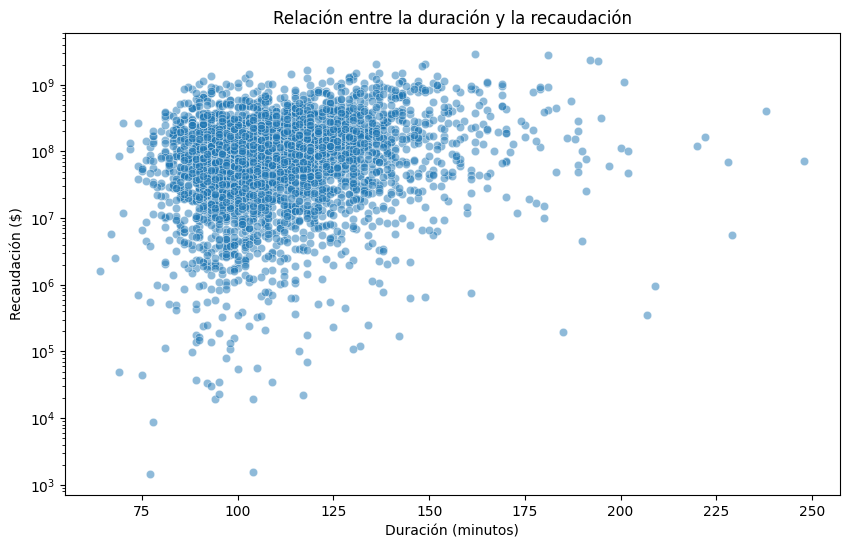

In [442]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dbpop, x='runtime', y='revenue_x', alpha=0.5)
plt.title('Relación entre la duración y la recaudación')
plt.xlabel('Duración (minutos)')
plt.ylabel('Recaudación ($)')
plt.yscale('log')
plt.show()

Necesito agrupar las duraciones como he hecho con las decadas

In [443]:
grupos = [0, 90, 120, 150, 180, 240] 
label = ['<1.5h', '1.5-2h', '2-2.5h', '2.5-3h', '3h+']
dbpop.loc[:, 'runtime_group'] = pd.cut(dbpop['runtime'], bins=grupos, labels=label)


/var/folders/3z/73lxqgp11kb61sfk787_46800000gn/T/ipykernel_85907/3665076603.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbpop.loc[:, 'runtime_group'] = pd.cut(dbpop['runtime'], bins=grupos, labels=label)


In [446]:
dbpop.sort_values('budget_x',ascending=False)

,id,Title,vote_average,vote_count,status,Year,revenue_x,runtime,adult,budget_x,popularity_x,genres_x,production_countries_x,spoken_languages,Budget,Income,Country_of_origin,decade,decade_numeric,runtime_group
11682,76600.0,Avatar: The Way of Water,"Science Fiction, Adventure, Action",9830.0,Released,2022.0,2.320250e+09,192.0,False,460000000.0,241.0,"Science Fiction, Adventure, Action",United States of America,English,"$350,000,000","$2,267,946,983",United States,2020s,2020.0,3h+
85858,1865.0,Pirates of the Caribbean: On Stranger Tides,"Adventure, Action, Fantasy",13126.0,Released,2011.0,1.045714e+09,137.0,False,379000000.0,79.0,"Adventure, Action, Fantasy","United Kingdom, United States of America","English, Spanish","$250,000,000","$1,045,713,802","United States, United Kingdom",2010s,2010.0,2-2.5h
11708,99861.0,Avengers: Age of Ultron,"Action, Adventure, Science Fiction",21754.0,Released,2015.0,1.405404e+09,141.0,False,365000000.0,96.0,"Action, Adventure, Science Fiction",United States of America,English,"$250,000,000","$1,402,809,540",United States,2010s,2010.0,2-2.5h
11709,299534.0,Avengers: Endgame,"Adventure, Science Fiction, Action",23857.0,Released,2019.0,2.800000e+09,181.0,False,356000000.0,91.0,"Adventure, Science Fiction, Action",United States of America,"English, Japanese, Xhosa","$356,000,000","$2,797,501,328",United States,2010s,2010.0,3h+
39350,385687.0,Fast X,"Action, Crime, Thriller",3881.0,Released,2023.0,7.047097e+08,142.0,False,340000000.0,117.5,"Action, Crime, Thriller",United States of America,English,NaN,NaN,NaN,2020s,2020.0,2-2.5h
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143068,398181.0,You Were Never Really Here,"Crime, Drama, Thriller",2559.0,Released,2017.0,1.089128e+07,89.0,False,NaN,16.0,"Crime, Drama, Thriller","United Kingdom, United States of America, France",English,<NA>,"$9,360,514","United Kingdom, France, United States",2010s,2010.0,<1.5h
143366,372058.0,Your Name.,"Romance, Animation, Drama",10303.0,Released,2016.0,3.579861e+08,106.0,False,NaN,68.0,"Romance, Animation, Drama",Japan,Japanese,"¥370,000,000","$358,180,115",Japan,2010s,2010.0,1.5-2h
144186,537116.0,"tick, tick... BOOM!","Drama, Music",1825.0,Released,2021.0,NaN,120.0,False,NaN,12.0,"Drama, Music",United States of America,"English, Spanish","$55,000,000","$112,777",United States,2020s,2020.0,1.5-2h
decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Voy a tratar de mostrar la media de recaudacion de las peliculas agrupandolas por los intervalos de duración, para despues de ello hacer un gráfico que muestre las diferencias entre medias.

In [447]:
runtimemedia = dbpop.groupby('runtime_group')['revenue_x'].mean()
runtimemed=runtimemedia.reset_index()
cuantos= dbpop.groupby('runtime_group').size()
runtimemed['contador'] = cuantos.values
runtimemed


/var/folders/3z/73lxqgp11kb61sfk787_46800000gn/T/ipykernel_85907/2533548739.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  runtimemedia = dbpop.groupby('runtime_group')['revenue_x'].mean()
/var/folders/3z/73lxqgp11kb61sfk787_46800000gn/T/ipykernel_85907/2533548739.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cuantos= dbpop.groupby('runtime_group').size()


,runtime_group,revenue_x,contador
0,<1.5h,1.070516e+08,459
1,1.5-2h,1.273351e+08,2389
2,2-2.5h,2.296340e+08,890
3,2.5-3h,3.186680e+08,134
4,3h+,4.206028e+08,32


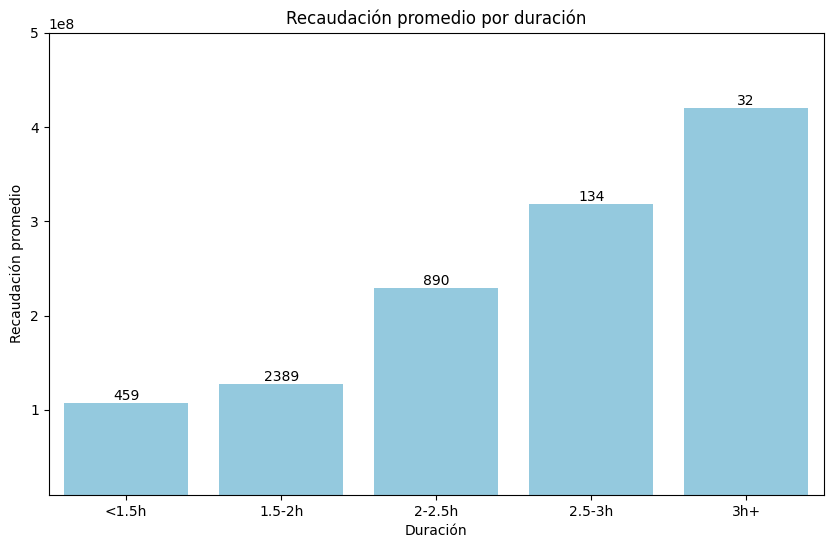

In [449]:
plt.figure(figsize=(10, 6))
bar=sns.barplot(data=runtimemed, x='runtime_group',y='revenue_x',color='skyblue')
plt.title('Recaudación promedio por duración')
plt.xlabel('Duración')
plt.ylabel('Recaudación promedio')
plt.bar_label(bar.containers[0], labels=runtimemed['contador'], label_type='edge', fontsize=10)

plt.ylim(10000000,500000000)
plt.show()

Aunque la gráfica tiene sentido, atendiendo al escaso numero de peliculas largas que hay pero el renombre y el impacto mediático que tiene cada una, voy a estudiar la rentabilidad por fragmentos, atendiendo al presupuesto y la recaudacion.

In [452]:
dbpop.groupby('runtime_group')['budget_x'].mean()

/var/folders/3z/73lxqgp11kb61sfk787_46800000gn/T/ipykernel_85907/3285505025.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dbpop.groupby('runtime_group')['budget_x'].mean()


runtime_group
<1.5h     2.918314e+07
1.5-2h    4.114636e+07
2-2.5h    6.622918e+07
2.5-3h    8.853282e+07
3h+       7.500625e+07
Name: budget_x, dtype: float64

In [453]:
runtimebmedia = dbpop.groupby('runtime_group')['budget_x'].mean()
runtimebmed = runtimebmedia.reset_index()
cuantos = dbpop.groupby('runtime_group').size()
runtimebmed['contador'] = cuantos.values
runtimebmed

/var/folders/3z/73lxqgp11kb61sfk787_46800000gn/T/ipykernel_85907/1101724324.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  runtimebmedia = dbpop.groupby('runtime_group')['budget_x'].mean()
/var/folders/3z/73lxqgp11kb61sfk787_46800000gn/T/ipykernel_85907/1101724324.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cuantos = dbpop.groupby('runtime_group').size()


,runtime_group,budget_x,contador
0,<1.5h,2.918314e+07,459
1,1.5-2h,4.114636e+07,2389
2,2-2.5h,6.622918e+07,890
3,2.5-3h,8.853282e+07,134
4,3h+,7.500625e+07,32


In [455]:
runtimerent = dbpop.groupby('runtime_group').apply(lambda x: (x['revenue_x'] - x['budget_x']).mean())
runtimerentabilidad = runtimerent.reset_index(name='rentabilidad')
cuantos = dbpop.groupby('runtime_group').size()
runtimerentabilidad['contador'] = cuantos.values
print(runtimerentabilidad.columns);
runtimerentabilidad


Index(['runtime_group', 'rentabilidad', 'contador'], dtype='object')


/var/folders/3z/73lxqgp11kb61sfk787_46800000gn/T/ipykernel_85907/2564455819.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  runtimerent = dbpop.groupby('runtime_group').apply(lambda x: (x['revenue_x'] - x['budget_x']).mean())
/var/folders/3z/73lxqgp11kb61sfk787_46800000gn/T/ipykernel_85907/2564455819.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  runtimerent = dbpop.groupby('runtime_group').apply(lambda x: (x['revenue_x'] - x['budget_x']).mean())
/var/folders/3z/73lxqgp11kb61sfk787_46800000gn/T/ipyk

,runtime_group,rentabilidad,contador
0,<1.5h,8.224845e+07,459
1,1.5-2h,9.121935e+07,2389
2,2-2.5h,1.681847e+08,890
3,2.5-3h,2.355949e+08,134
4,3h+,3.455966e+08,32


/var/folders/3z/73lxqgp11kb61sfk787_46800000gn/T/ipykernel_85907/2846475171.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{int(y/1e6)}M' for y in plt.gca().get_yticks()]) #he tenido que buscar como evitar el 1e8 en la esquina


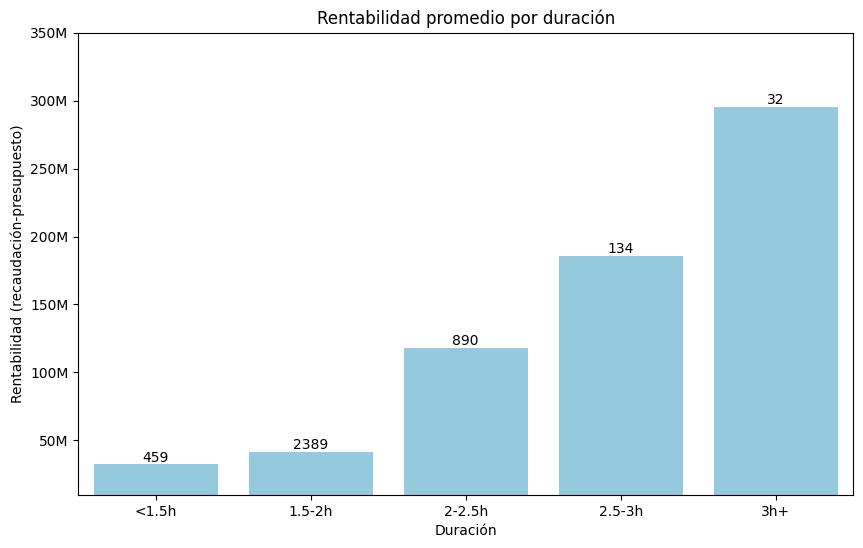

In [456]:
plt.figure(figsize=(10, 6))
bar=sns.barplot(data=runtimerentabilidad, x='runtime_group',y='rentabilidad',color='skyblue')
plt.title('Rentabilidad promedio por duración')
plt.xlabel('Duración')
plt.ylabel('Rentabilidad (recaudación-presupuesto)')
plt.bar_label(bar.containers[0], labels=runtimerentabilidad['contador'], label_type='edge', fontsize=10)
plt.gca().set_yticklabels([f'{int(y/1e6)}M' for y in plt.gca().get_yticks()]) #he tenido que buscar como evitar el 1e8 en la esquina


plt.ylim(60000000,400000000)
plt.show()

In [457]:
peliculas_con_revenue_0 = dbpop[dbpop['revenue_x']<1000000]

ceroporgrupo = peliculas_con_revenue_0.groupby('runtime_group').size()
ceroporgrupo

/var/folders/3z/73lxqgp11kb61sfk787_46800000gn/T/ipykernel_85907/1930835999.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ceroporgrupo = peliculas_con_revenue_0.groupby('runtime_group').size()


runtime_group
<1.5h     26
1.5-2h    59
2-2.5h    12
2.5-3h     2
3h+        3
dtype: int64

Voy a intentar estudiar la hipotesis de las secuelas analizando la repeticion de palabras en los titulos. Aunque muchas secuelas o precuelas cambian el titulo o se dirigen a otro personaje de la pelicula original, hay un buen numero que simplemente añaden una coletilla o un numero a la pelicula original, o directamente copian el nombre (Aladdin, Scary Movie...)

In [ ]:
moviesdbinfo.rename(columns={'release_date':'Year'},inplace=True)
moviesdbinfo.rename(columns={'title':'Title'},inplace=True)
moviesdbinfo['popularity'] = moviesdbinfo['popularity'].apply(lambda x: str(x).split('.')[0])
moviesdbinfo['popularity'] = moviesdbinfo['popularity'].astype(int)
moviesdbinfo['Year'] = moviesdbinfo['Year'].apply(lambda x: str(x).split('-')[0])
moviesdbinfo['Year']=moviesdbinfo['Year'].replace('nan','0')
moviesdbinfo['Year']=moviesdbinfo['Year'].fillna(0)
moviesdbinfo['Year']=moviesdbinfo['Year'].replace(0,pd.NA)
moviesdbinfo['Year']=moviesdbinfo['Year'].astype('int')
moviesdb_['decade'] = (moviesdb_['Year'] // 10 * 10).astype(int).astype(str) + "s"
dbpop['decade'] = (dbpop['Year'] // 10 * 10).astype(str) + "s"
moviesdb_['decade_numeric'] = moviesdb_['Year'] // 10 * 10
dbpop['decade_numeric'] = dbpop['Year'] // 10 * 10

/var/folders/3z/73lxqgp11kb61sfk787_46800000gn/T/ipykernel_85907/1153742945.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbpop['decade'] = (dbpop['Year'] // 10 * 10).astype(str) + "s"
/var/folders/3z/73lxqgp11kb61sfk787_46800000gn/T/ipykernel_85907/1153742945.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbpop['decade_numeric'] = dbpop['Year'] // 10 * 10


In [ ]:
moviesdbinfo['decade'] = (moviesdbinfo['Year'] // 10 * 10).astype(int).astype(str) + "s"
moviesdbinfo['decade_numeric'] = moviesdbinfo['Year'] // 10 * 10
moviesdbinfo.columns



Index(['id', 'Title', 'vote_average', 'vote_count', 'status', 'Year',
       'revenue', 'runtime', 'adult', 'budget', 'overview', 'popularity',
       'genres', 'production_countries', 'spoken_languages', 'decade',
       'decade_numeric'],
      dtype='object')

In [ ]:
popinfo=moviesdbinfo[(moviesdbinfo['vote_count']>300)]
popinfo.shape

(8706, 17)

In [ ]:
palabrasec = ['sequel', 'remake', 'reboot', 'prequel', 'spin-off', 'spinoff', 'based on']
posiblesec = popinfo[popinfo['overview'].astype(str).str.contains('|'.join(palabrasec), case=False, na=False)]
posiblesec.shape

(165, 17)

In [ ]:
posiblesec.head(2)

,id,Title,vote_average,vote_count,status,Year,revenue,runtime,adult,budget,overview,popularity,genres,production_countries,spoken_languages,decade,decade_numeric
22,106646,The Wolf of Wall Street,8.035,22222,Released,2013,392000000,180,False,100000000,"A New York stockbroker refuses to cooperate in a large securities fraud case involving corruption on Wall Street, corporate banking world and mob infiltration. Based on Jordan Belfort's autobiography.",97,"Crime, Drama, Comedy",United States of America,"English, French",2010s,2010
45,807,Se7en,8.368,19403,Released,1995,327311859,127,False,33000000,"Two homicide detectives are on a desperate hunt for a serial killer whose crimes are based on the ""seven deadly sins"" in this dark and haunting film that takes viewers from the tortured remains of one victim to the next. The seasoned Det. Sommerset researches each sin in an effort to get inside the killer's mind, while his novice partner, Mills, scoffs at his efforts to unravel the case.",53,"Crime, Mystery, Thriller",United States of America,English,1990s,1990


<Axes: title={'center': 'Peliculas cuya descripcion incluye una palabra clave'}, xlabel='Decada', ylabel='Nº de películas'>

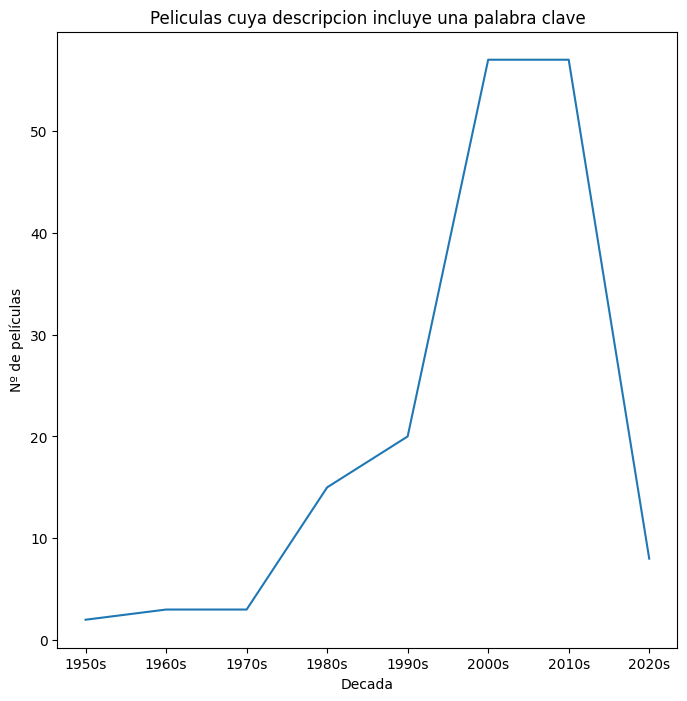

In [ ]:
plt.figure(figsize=(8,8))
plt.title('Peliculas cuya descripcion incluye una palabra clave')
plt.ylabel('Nº de películas')
plt.xlabel('Decada')
sns.lineplot(posiblesec.groupby('decade')['Title'].count())

In [ ]:
print(popinfo[(popinfo['Year']>=2010)&(popinfo['Year']<2020)].shape)
print(popinfo[popinfo['Year']>=2020].shape)


(3320, 17)
(873, 17)


Text(0.5, 1.0, 'Peliculas analizadas en la hipotesis de las secuelas')

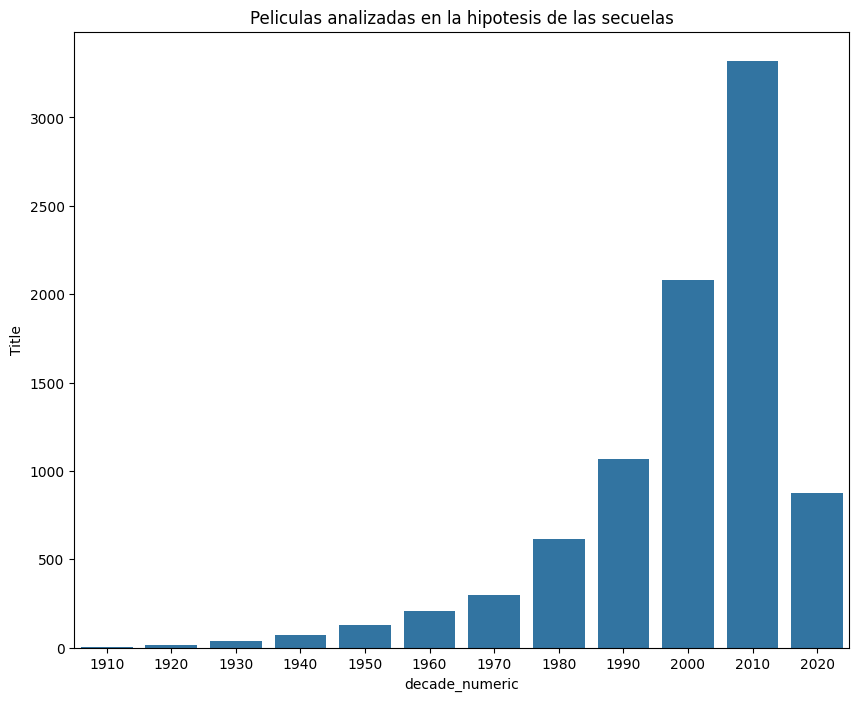

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(popinfo.groupby('decade_numeric')['Title'].count())
plt.title('Peliculas analizadas en la hipotesis de las secuelas')

Ya que con las descripciones no he obtenido los resultados que esperaba, aun teniendo en cuenta que hay tres veces mas peliculas de la anterior decada que de la actual, voy a intentarlo con los titulos, buscando las peliculas que repiten palabras grandes en sus nombres (ignorando los articulos y conectores comunes), y que incluyen números, numeros en romano, o 'Parte'. Para ello, admito que me he ayudado de ChatGPT pues no conseguia hacerlo bien para dividir los titulos en palabras y letras, buscar repeticiones y hacer la triple mascara junto con los numeros y las palabras clave.

In [ ]:
palabras_comunes = ['the', 'a', 'an', 'and', 'or', 'of', 'in', 'on', 'to', 'for', 'with', 'by']
palabras_clave = ['part', 'p.', 'volume', 'vol.']

# Filtrar títulos con palabras repetidas
mask_repetidos = popinfo['Title'].astype(str).str.lower().str.split().apply(lambda palabras: any(palabras.count(p) > 1 for p in palabras if p not in palabras_comunes))

# Filtrar con números o números romanos
mask_numeros = popinfo['Title'].str.contains(r'\b(?:[0-9]+|[ivxlcdmIVXLCDM]+)\b', na=False, case=False)

# Con palabras clave
mask_palabras_clave = popinfo['Title'].str.contains('|'.join(palabras_clave), case=False, na=False)

# Combinar todas las máscaras
masksecuelas = mask_repetidos | mask_numeros | mask_palabras_clave

titulossecuelas = popinfo[masksecuelas]

titulossecuelas.shape

(2473, 17)

<Axes: title={'center': 'Peliculas cuyo título incluye una palabra clave o repetida'}, xlabel='Decada', ylabel='Nº de películas'>

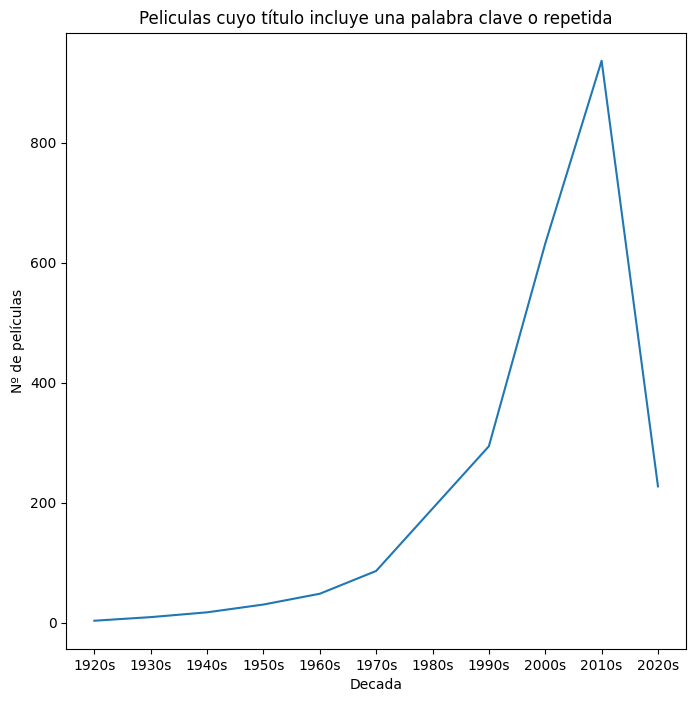

In [ ]:
plt.figure(figsize=(8,8))
plt.title('Peliculas cuyo título incluye una palabra clave o repetida')
plt.ylabel('Nº de películas')
plt.xlabel('Decada')
sns.lineplot(titulossecuelas.groupby('decade')['Title'].count())

In [ ]:
secuelas=pd.merge(posiblesec,titulossecuelas,on=['Title','decade','decade_numeric'],how='outer')
secuelas.columns

Index(['id_x', 'Title', 'vote_average_x', 'vote_count_x', 'status_x', 'Year_x',
       'revenue_x', 'runtime_x', 'adult_x', 'budget_x', 'overview_x',
       'popularity_x', 'genres_x', 'production_countries_x',
       'spoken_languages_x', 'decade', 'decade_numeric', 'id_y',
       'vote_average_y', 'vote_count_y', 'status_y', 'Year_y', 'revenue_y',
       'runtime_y', 'adult_y', 'budget_y', 'overview_y', 'popularity_y',
       'genres_y', 'production_countries_y', 'spoken_languages_y'],
      dtype='object')

<Axes: title={'center': 'Peliculas cuyo título o descripcion incluye una palabra clave o repetida'}, xlabel='Decada', ylabel='Nº de películas'>

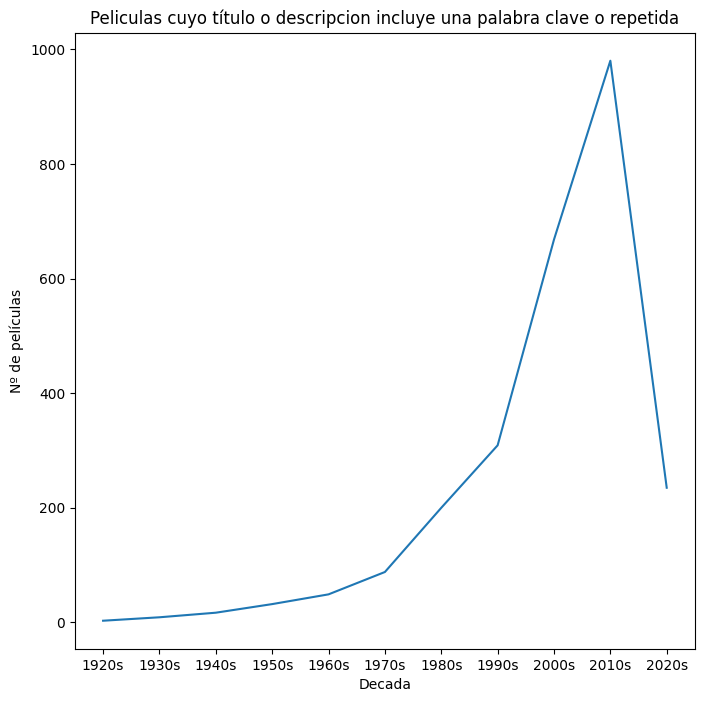

In [ ]:
plt.figure(figsize=(8,8))
plt.title('Peliculas cuyo título o descripcion incluye una palabra clave o repetida')
plt.ylabel('Nº de películas')
plt.xlabel('Decada')
sns.lineplot(secuelas.groupby('decade')['Title'].count())

Tampoco me muestra nada cercano a mi hipótesis, asi que para terminar voy a tratar de conseguir un grafico que muestre el ratio de peliculas cuyo titulo o descripcion incluya una palabra clave/peliculas analizadas en esta hipotesis, por decadas, a ver si me aporta algo mas cercano a lo que creía.

In [ ]:
total_por_decada = popinfo.groupby('decade')['Title'].count()
secuelas_por_decada = secuelas.groupby('decade')['Title'].count()
ratio_por_decada = secuelas_por_decada / total_por_decada

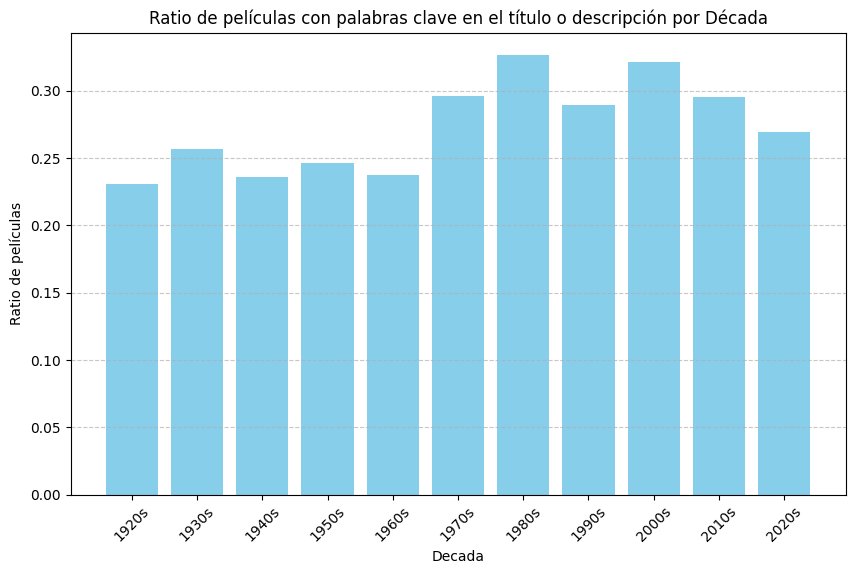

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(ratio_por_decada.index,ratio_por_decada.values, color='skyblue')
plt.title('Ratio de películas con palabras clave en el título o descripción por Década')
plt.xlabel('Decada')
plt.ylabel('Ratio de películas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

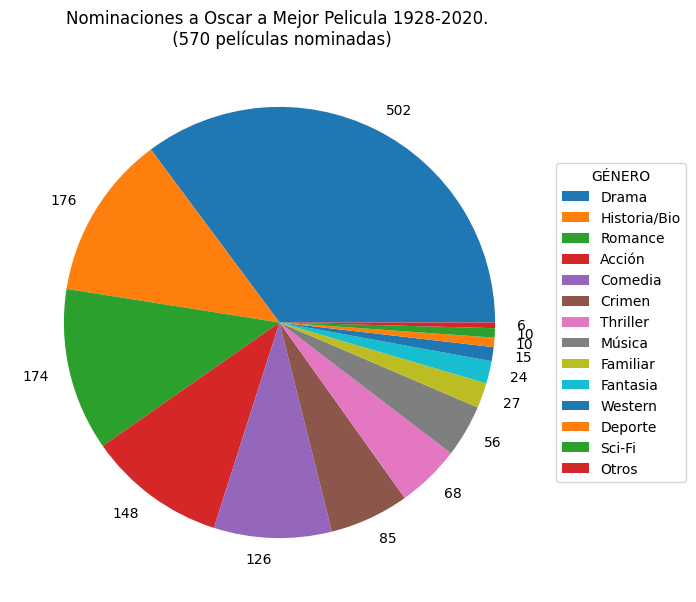

In [ ]:
plt.figure(figsize=(12,7))
plt.pie(data=conteo_generosnom,x=conteo_generosnom,labels=conteo_generosnom.values)
plt.title('Nominaciones a Oscar a Mejor Pelicula 1928-2020. \n (570 películas nominadas)')
plt.legend(conteo_generosnom.index,title='GÉNERO',loc='center left',bbox_to_anchor=(1,0.5))
plt.show()

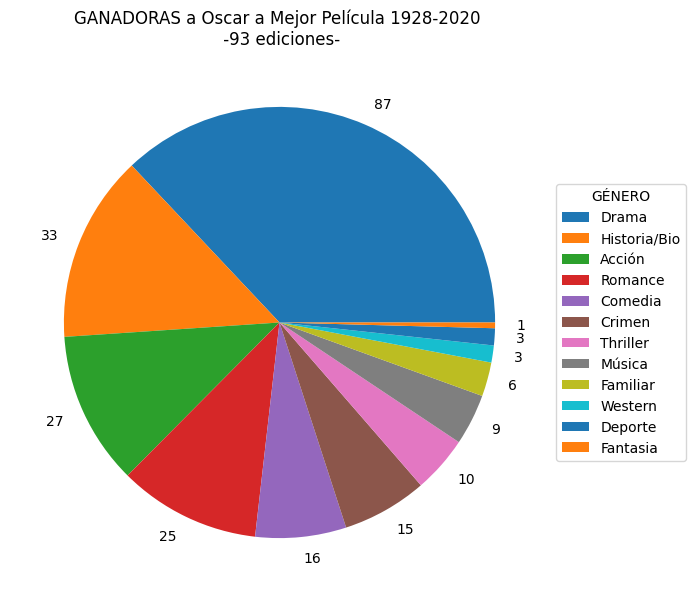

In [ ]:
plt.figure(figsize=(12,7))
plt.pie(data=conteo_generosw,x=conteo_generosw,labels=conteo_generosw.values)
plt.title('GANADORAS a Oscar a Mejor Película 1928-2020 \n -93 ediciones-',loc='center')
plt.legend(conteo_generosw.index,title='GÉNERO',loc='center left',bbox_to_anchor=(1,0.5))
plt.show()

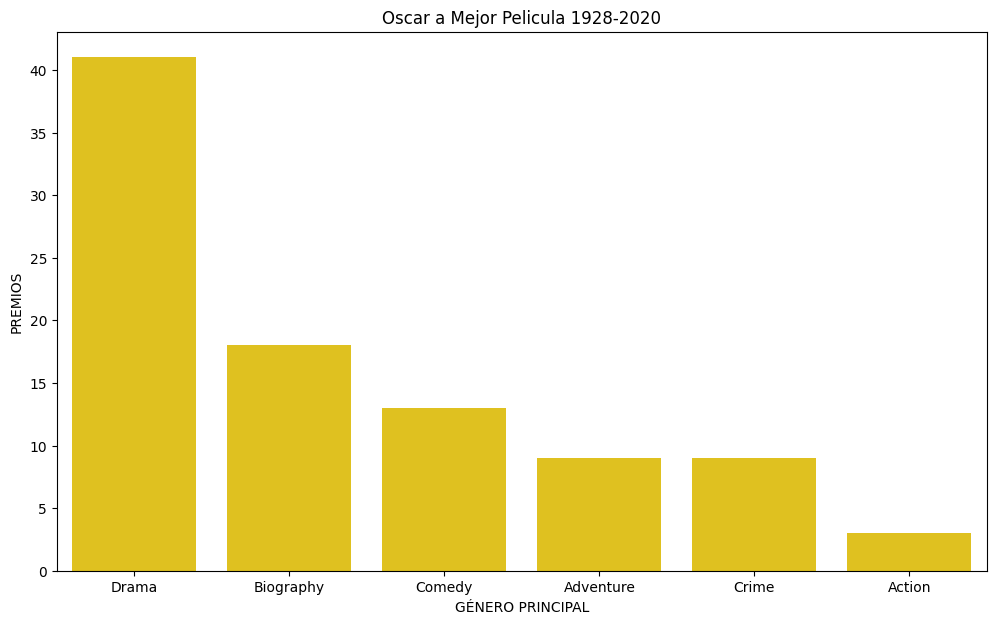

In [459]:
plt.figure(figsize=(12,7))
sns.barplot(conteo_oscargenprincipal,color='gold')
plt.ylabel('PREMIOS')
plt.xlabel('GÉNERO PRINCIPAL')
plt.title('Oscar a Mejor Pelicula 1928-2020',loc='center')
plt.show()